# Data 422

Data Wrangling, S2 2023

## Assignement 2

### 20% of final grade

## Due date: 11:59pm Friday 29th September 2023

The assignment must be submitted on the DATA 201 and 422 Learn page and should be **your own pair** (or group of three if we are odd) **work**. Avoid plagiarism: if you are not sure what may constitute code plagiarism, read this http://web.science.mq.edu.au/~mtaylor/ponline/index.php?id=source-code-plagiarism. Remember, when in doubt **declare your sources**.  
As a general rule, late submission are **highly** unsuggested. The pace of the course is very quick, and you don't want to be working on this too long, as you would have less time for other assignments. I suggest you to submit what you have ready by the time the assignment is due, even if it is not everything we required. For any particular problem, please contact [Thomas Li](thomas.li@canterbury.ac.nz) or [Giulio Dalla Riva](giulio.dallariva@canterbury.ac.nz) or TAs.


## Instruction

### Total: 25 marks.

For this assignment you will work with data from the web. Your goal is to scrape it or request it, wrangle it, produce some plotting, in order to demonstrate that you are able to use the functions, plotting, and markdown format we have been learning.  
You shall hand in your work as a jupyter R notebook comprehending the code, the plots and, **very important**, enough comments and explanations for us to understand what you did, how you did it, and why you did it. Remember: better comments equal to better marks.  
You can either modify this notebook or write a new one from scratch.

## Comment, explain, present your work in a clear way (1 mark)

## R part (overall 19 marks)

Do use the tidyverse syntax that's introduced in class and labs. If in doubt, refresh the lab material 1 to 4.

## Submitted in group by Naman Rastogi(nra99) and Shivanashu Tandon(sta219)

### Task (a): scrape it (5 marks)

Identify a website page showing information you find interesting. The information should be presented across more than one page. Select one of this pages (the rest is for later) and using `rvest` (and the suit of `tidyverse` libraries we used so far, plus any other one you may need) get the html into R.

In [200]:
# install.packages('gifski')
# install.packages('av')
# install.packages('magick')
# install.packages('gganimate')
# install.packages('sjmisc')
# install.packages('rvest')
# install.packages('httr')

In [213]:
#importing required libraries
library(tidyverse)
library(rvest)
library(dplyr)
library(IRdisplay)
library(ggplot2)
library(gganimate)
library(sjmisc)
library(magick)

# About Our Data

# We're diving into Formula 1 analysis – buckle up for a thrilling ride 🏁

# F1 Race Results 2022

In [214]:
# Define the URL of the Formula 1 results page for the year 2022
url <- "https://www.formula1.com/en/results.html/2022/races.html"

In [215]:
#Reading the url into the page variable with rvest
page <- read_html(url)
#Scraping results of 2022 Races in a table using html class name.
results_2022 <- page %>%
                    #Class name for the results table : .resultsarchive-table
                    html_nodes(".resultsarchive-table") %>% 
                    html_table(header = TRUE)

results_2022 <- data.frame(results_2022)

In [216]:
results_2022 %>% head()

Var.1 Grand.Prix     Date       
1 NA    Bahrain        20 Mar 2022
2 NA    Saudi Arabia   27 Mar 2022
3 NA    Australia      10 Apr 2022
4 NA    Emilia Romagna 24 Apr 2022
5 NA    Miami          08 May 2022
6 NA    Spain          22 May 2022
  Winner                                                                                 
1 Charles\n                        Leclerc\n                    \n                    LEC
2 Max\n                        Verstappen\n                    \n                    VER 
3 Charles\n                        Leclerc\n                    \n                    LEC
4 Max\n                        Verstappen\n                    \n                    VER 
5 Max\n                        Verstappen\n                    \n                    VER 
6 Max\n                        Verstappen\n                    \n                    VER 
  Car                  Laps Time        Var.8
1 Ferrari              57   1:37:33.584 NA   
2 Red Bull Racing RBPT 50   1:24:19.293 NA   
3 Ferrari              58   1:27:46.548 NA   
4 Red Bull Racing RBPT 63   1:32:07.986 NA   
5 Red Bull Racing RBPT 57   1:34:24.258 NA   
6 Red Bull Racing RBPT 66   1:37:20.475 NA

### Cleaning Data - <i> Removing NA Rows </i>

In [217]:
results_2022 <- results_2022[ , colSums(is.na(results_2022))==0]
results_2022 %>% head()

Grand.Prix     Date       
1 Bahrain        20 Mar 2022
2 Saudi Arabia   27 Mar 2022
3 Australia      10 Apr 2022
4 Emilia Romagna 24 Apr 2022
5 Miami          08 May 2022
6 Spain          22 May 2022
  Winner                                                                                 
1 Charles\n                        Leclerc\n                    \n                    LEC
2 Max\n                        Verstappen\n                    \n                    VER 
3 Charles\n                        Leclerc\n                    \n                    LEC
4 Max\n                        Verstappen\n                    \n                    VER 
5 Max\n                        Verstappen\n                    \n                    VER 
6 Max\n                        Verstappen\n                    \n                    VER 
  Car                  Laps Time       
1 Ferrari              57   1:37:33.584
2 Red Bull Racing RBPT 50   1:24:19.293
3 Ferrari              58   1:27:46.548
4 Red Bull Racing RBPT 63   1:32:07.986
5 Red Bull Racing RBPT 57   1:34:24.258
6 Red Bull Racing RBPT 66   1:37:20.475

# Monza, Italy Race Results 2022

In [218]:
# Define the URL of the Formula 1 results page for a Italy circuit for the year 2022
url <- "https://www.formula1.com/en/results.html/2022/races/1120/italy/race-result.html"

In [219]:
page <- read_html(url)
#Scraping data for 2022 results for Italy Circuit
results_italy <- page %>%
                    #Class name for the results table : .resultsarchive-table
                    html_nodes(".resultsarchive-table") %>% 
                    html_table(header = TRUE)

#Data scraped is in the form of list let's convert it to dataframe using data.frame function
results_italy <- data.frame(results_italy)

#Dropping Columns with NA values
results_italy <- results_italy[ , colSums(is.na(results_italy))==0] %>%
                                                                 # and renaming columns for better understanding
                                                                 rename('Race.Position' = Pos, 'Driver.No' = No)

### Max Verstappen winning here as well1️⃣

In [220]:
results_italy %>% head(5)

Race.Position Driver.No
1 1              1       
2 2             16       
3 3             63       
4 4             55       
5 5             44       
  Driver                                                                                 
1 Max\n                        Verstappen\n                    \n                    VER 
2 Charles\n                        Leclerc\n                    \n                    LEC
3 George\n                        Russell\n                    \n                    RUS 
4 Carlos\n                        Sainz\n                    \n                    SAI   
5 Lewis\n                        Hamilton\n                    \n                    HAM 
  Car                  Laps Time.Retired PTS
1 Red Bull Racing RBPT 53   1:20:27.511  25 
2 Ferrari              53   +2.446s      18 
3 Mercedes             53   +3.405s      15 
4 Ferrari              53   +5.061s      12 
5 Mercedes             53   +5.380s      10

# Fastest Lap Summary for Monza, 2022 Race

In [221]:
# Define the URL of the Formula 1 results page for a Italy circuit for the year 2022
url <- "https://www.formula1.com/en/results.html/2022/races/1120/italy/fastest-laps.html"
page <- read_html(url)
#Scarping data for 2022 results for Italy Circuit about fastest lap times for every racer.
italy_fastest_lap <- page %>%
                    #Class name for the results table : .resultsarchive-table
                    html_nodes(".resultsarchive-table") %>% 
                    html_table(header = TRUE)

#Data scraped is in the form of list let's convert it to dataframe using data.frame function
italy_fastest_lap <- data.frame(italy_fastest_lap)

#Dropping Columns with NA values
italy_fastest_lap <- italy_fastest_lap[ , colSums(is.na(italy_fastest_lap))==0] %>%
                                                                 # and renaming columns for better understanding
                                                                 rename('Fastest Lap Rank' = Pos, 'Driver.No' = No)
italy_fastest_lap %>% head(5)

Fastest Lap Rank Driver.No
1 1                11       
2 2                16       
3 3                44       
4 4                55       
5 5                 4       
  Driver                                                                                 
1 Sergio\n                        Perez\n                    \n                    PER   
2 Charles\n                        Leclerc\n                    \n                    LEC
3 Lewis\n                        Hamilton\n                    \n                    HAM 
4 Carlos\n                        Sainz\n                    \n                    SAI   
5 Lando\n                        Norris\n                    \n                    NOR   
  Car                  Lap Time.of.day Time     Avg.Speed
1 Red Bull Racing RBPT 46  16:11:02    1:24.030 248.182  
2 Ferrari              38  15:58:50    1:24.336 247.282  
3 Mercedes             43  16:06:39    1:24.434 246.995  
4 Ferrari              41  16:03:26    1:24.446 246.960  
5 McLaren Mercedes     43  16:06:44    1:24.718 246.167

# Same goes for Pitstop Summary and Starting Grid for the same race

In [222]:
# Define the URL of the Formula 1 results page for a Italy circuit for the year 2022
url <- "https://www.formula1.com/en/results.html/2022/races/1120/italy/pit-stop-summary.html"
page <- read_html(url)
#Scraping data for 2022 results for Italy Circuit about Pitstops.
italy_pitstops <- page %>%
                    #Class name for the results table : .resultsarchive-table
                    html_nodes(".resultsarchive-table") %>% 
                    html_table(header = TRUE)

#Data scraped is in the form of list let's convert it to dataframe using data.frame function
italy_pitstops <- data.frame(italy_pitstops)

#Dropping Columns with NA values
italy_pitstops <- italy_pitstops[ , colSums(is.na(italy_pitstops))==0] %>%
                                                                 # and renaming columns for better understanding
                                                                  rename('Stop.No' = Stops, 'Driver.No' = No)

In [223]:
italy_pitstops %>% tail(5)

Stop.No Driver.No
24 2        4       
25 2        1       
26 2       22       
27 3       16       
28 2        6       
   Driver                                                                                 
24 Lando\n                        Norris\n                    \n                    NOR   
25 Max\n                        Verstappen\n                    \n                    VER 
26 Yuki\n                        Tsunoda\n                    \n                    TSU   
27 Charles\n                        Leclerc\n                    \n                    LEC
28 Nicholas\n                        Latifi\n                    \n                    LAT
   Car                  Lap Time.of.day Time   Total   
24 McLaren Mercedes     47  16:12:41    24.784 51.498  
25 Red Bull Racing RBPT 48  16:13:04    24.091 47.882  
26 AlphaTauri RBPT      47  16:13:25    23.904 47.913  
27 Ferrari              48  16:13:27    23.719 1:11.154
28 Williams Mercedes    47  16:13:35    24.263 51.045

In [224]:
url <- "https://www.formula1.com/en/results.html/2022/races/1120/italy/starting-grid.html"
page <- read_html(url)
# Scraping data for 2022 results for Italy Circuit about starting position of the racers.
italy_start_grid <- page %>%
                    # Class name for the results table : .resultsarchive-table
                    html_nodes(".resultsarchive-table") %>% 
                    html_table(header = TRUE)

# Data scraped is in the form of list let's convert it to dataframe using data.frame function
italy_start_grid <- data.frame(italy_start_grid)

# Dropping Columns with NA values
italy_start_grid <- italy_start_grid[ , colSums(is.na(italy_start_grid))==0] %>%
                                                                 # and renaming columns for better understanding
                                                                 rename('Starting.Position' = Pos, 'Driver.No' = No, 'Qualifying.Time' = Time)
italy_start_grid %>% head(5)

Starting.Position Driver.No
1 1                 16       
2 2                 63       
3 3                  4       
4 4                  3       
5 5                 10       
  Driver                                                                                  
1 Charles\n                        Leclerc\n                    \n                    LEC 
2 George\n                        Russell\n                    \n                    RUS  
3 Lando\n                        Norris\n                    \n                    NOR    
4 Daniel\n                        Ricciardo\n                    \n                    RIC
5 Pierre\n                        Gasly\n                    \n                    GAS    
  Car              Qualifying.Time
1 Ferrari          1:20.161       
2 Mercedes         1:21.542       
3 McLaren Mercedes 1:21.584       
4 McLaren Mercedes 1:21.925       
5 AlphaTauri RBPT  1:22.648

### Task (b): wrangle it (5 marks)


Working on the page from task (a), transform the data you collected into relational data model (that is, one or more data frames). WARNING: you will need to think and motivate how you are doing this in terms of the **data model** you are trying to build; just throwing everything in a table is not enough.

### Read Me

1. We successfully scraped data for Monza, Italy for the F1 Race of 2022
2. The dataframes we scraped are <br> <i>  > Race Results - 'results_italy' </i><br> <i>  > Fastest Lap Times - 'italy_fastest_lap'</i><br> <i>  > Pitstops Summary - 'italy_pitstops'</i><br> <i>  > Starting Grid - 'italy_start_grid'</i>

### Relation we are about to establish

From the data mentioned above we are going to establish relation between the data frames using our : <i>(Conclusions below)</i>
### Primary Key - 🔑<i> ' Driver ID ' aka ' No ' column</i><h6> - Which is unique for all the dataframes fetched.

In [225]:
# Checking if No is actually a primary key?
results_italy %>%  # Lets take Italy race results for instance
  count(Driver.No) %>% 
  filter(n > 1)

Driver.No n

Aha, Exactly what we wanted.

# Relation Number 1

# Joining Result and Start Grid Dataframe based on our Driver Number Primary Key

In [226]:
summary_italy <- results_italy %>%
                                # Selecting All columns from results_italy table except Driver and Car to avoid duplicacy.
                                select(-Driver, -Car) %>%
                                # Doing a left join on italy_start_grid table
                                left_join(italy_start_grid, by = "Driver.No")

summary_italy

Race.Position Driver.No Laps Time.Retired PTS Starting.Position
1  1              1        53   1:20:27.511  25   7               
2  2             16        53   +2.446s      18   1               
3  3             63        53   +3.405s      15   2               
4  4             55        53   +5.061s      12  18               
5  5             44        53   +5.380s      10  19               
6  6             11        53   +6.091s       9  13               
7  7              4        53   +6.207s       6   3               
8  8             10        53   +6.396s       4   5               
9  9             45        53   +7.122s       2   8               
10 10            24        53   +7.910s       1   9               
11 11            31        53   +8.323s       0  14               
12 12            47        53   +8.549s       0  17               
13 13            77        52   +1 lap        0  15               
14 14            22        52   +1 lap        0  20               
15 15             6        52   +1 lap        0  10               
16 16            20        52   +1 lap        0  16               
17 NC             3        45   DNF           0   4               
18 NC            18        39   DNF           0  12               
19 NC            14        31   DNF           0   6               
20 NC             5        10   DNF           0  11               
   Driver                                                                                                   
1  Max\n                        Verstappen\n                    \n                    VER                   
2  Charles\n                        Leclerc\n                    \n                    LEC                  
3  George\n                        Russell\n                    \n                    RUS                   
4  Carlos\n                        Sainz\n                    \n                    SAI                     
5  Lewis\n                        Hamilton\n                    \n                    HAM                   
6  Sergio\n                        Perez\n                    \n                    PER                     
7  Lando\n                        Norris\n                    \n                    NOR                     
8  Pierre\n                        Gasly\n                    \n                    GAS                     
9  Nyck\n                        De Vries\n                    \n                    DEV                    
10 Zhou\n                        Guanyu\n                    \n                    \n                    ZHO
11 Esteban\n                        Ocon\n                    \n                    OCO                     
12 Mick\n                        Schumacher\n                    \n                    MSC                  
13 Valtteri\n                        Bottas\n                    \n                    BOT                  
14 Yuki\n                        Tsunoda\n                    \n                    TSU                     
15 Nicholas\n                        Latifi\n                    \n                    LAT                  
16 Kevin\n                        Magnussen\n                    \n                    MAG                  
17 Daniel\n                        Ricciardo\n                    \n                    RIC                 
18 Lance\n                        Stroll\n                    \n                    STR                     
19 Fernando\n                        Alonso\n                    \n                    ALO                  
20 Sebastian\n                        Vettel\n                    \n                    VET                 
   Car                          Qualifying.Time
1  Red Bull Racing RBPT         1:20.306       
2  Ferrari                      1:20.161       
3  Mercedes                     1:21.542       
4  Ferrari                      1:20.429       
5  Mercedes                     1:21.524       
6  Red Bull Racing 

<i> Footnote : NC - Not Completed, DNF - Did not finish

## Rearranging the columns and adding a Position Gained/Loss column

In [227]:
# Coverting Race Position column to numeric to calculate position gained/loss column.
summary_italy['Race.Position'] <- as.numeric(summary_italy$Race.Position)

# Mutating Position Column
summary_italy <- summary_italy %>%
                            mutate('Position+G/-L' = Starting.Position - Race.Position)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [228]:
# Rearranging Columns
summary_italy[, c(1, 2, 7, 8, 6, 9, 4, 3, 5, 10)]

Race.Position Driver.No
1   1             1       
2   2            16       
3   3            63       
4   4            55       
5   5            44       
6   6            11       
7   7             4       
8   8            10       
9   9            45       
10 10            24       
11 11            31       
12 12            47       
13 13            77       
14 14            22       
15 15             6       
16 16            20       
17 NA             3       
18 NA            18       
19 NA            14       
20 NA             5       
   Driver                                                                                                   
1  Max\n                        Verstappen\n                    \n                    VER                   
2  Charles\n                        Leclerc\n                    \n                    LEC                  
3  George\n                        Russell\n                    \n                    RUS                   
4  Carlos\n                        Sainz\n                    \n                    SAI                     
5  Lewis\n                        Hamilton\n                    \n                    HAM                   
6  Sergio\n                        Perez\n                    \n                    PER                     
7  Lando\n                        Norris\n                    \n                    NOR                     
8  Pierre\n                        Gasly\n                    \n                    GAS                     
9  Nyck\n                        De Vries\n                    \n                    DEV                    
10 Zhou\n                        Guanyu\n                    \n                    \n                    ZHO
11 Esteban\n                        Ocon\n                    \n                    OCO                     
12 Mick\n                        Schumacher\n                    \n                    MSC                  
13 Valtteri\n                        Bottas\n                    \n                    BOT                  
14 Yuki\n                        Tsunoda\n                    \n                    TSU                     
15 Nicholas\n                        Latifi\n                    \n                    LAT                  
16 Kevin\n                        Magnussen\n                    \n                    MAG                  
17 Daniel\n                        Ricciardo\n                    \n                    RIC                 
18 Lance\n                        Stroll\n                    \n                    STR                     
19 Fernando\n                        Alonso\n                    \n                    ALO                  
20 Sebastian\n                        Vettel\n                    \n                    VET                 
   Car                          Starting.Position Qualifying.Time Time.Retired
1  Red Bull Racing RBPT          7                1:20.306        1:20:27.511 
2  Ferrari                       1                1:20.161        +2.446s     
3  Mercedes                      2                1:21.542        +3.405s     
4  Ferrari                      18                1:20.429        +5.061s     
5  Mercedes                     19                1:21.524        +5.380s     
6  Red Bull Racing RBPT         13                1:21.206        +6.091s     
7  McLaren Mercedes              3                1:21.584        +6.207s     
8  AlphaTauri RBPT               5                1:22.648        +6.396s     
9  Williams Mercedes             8                1:22.471        +7.122s     
10 Alfa Romeo Ferrari            9                1:22.577        +7.910s     
11 Alpine Renault               14                1:22.130        +8.323s     
12 Haas Ferrari                 17                1:23.005        +8.549s     
13 Alfa Romeo Ferrari           15                1:22.235        +1 lap      
14 AlphaTauri RBPT              20       

# Relation 1 - Analysis

We're investigating the correlation between starting grid positions and the ultimate race results for our drivers. This paints a picture of how many overtakes unfolded during the race, giving us a gauge of how thrilling and exciting the race was. From this table, you can figure out both <b>Carlos Sainz</b> and <b>Lewis Hamilton</b> gained <b>14</b> positions and <b>Lando Norris</b> dropped from <b>P3 to P7</b>. Also, <b>Max Verstappen</b> who won the race, jumped <b>6</b> positions along with his fellow driver <b>Sergio Perez</b> who jumped <b>7</b>. All this information suggests that Monza 2022 was a cracker of a race!

# Relation Number 2

### Let's take a Pitstop for Pitstop analysis!

In [229]:
results_italy %>% head()
italy_pitstops %>% head()

Race.Position Driver.No
1 1              1       
2 2             16       
3 3             63       
4 4             55       
5 5             44       
6 6             11       
  Driver                                                                                 
1 Max\n                        Verstappen\n                    \n                    VER 
2 Charles\n                        Leclerc\n                    \n                    LEC
3 George\n                        Russell\n                    \n                    RUS 
4 Carlos\n                        Sainz\n                    \n                    SAI   
5 Lewis\n                        Hamilton\n                    \n                    HAM 
6 Sergio\n                        Perez\n                    \n                    PER   
  Car                  Laps Time.Retired PTS
1 Red Bull Racing RBPT 53   1:20:27.511  25 
2 Ferrari              53   +2.446s      18 
3 Mercedes             53   +3.405s      15 
4 Ferrari              53   +5.061s      12 
5 Mercedes             53   +5.380s      10 
6 Red Bull Racing RBPT 53   +6.091s       9

Stop.No Driver.No
1 1       11       
2 1       16       
3 1        6       
4 1       10       
5 1       24       
6 1       18       
  Driver                                                                                                   
1 Sergio\n                        Perez\n                    \n                    PER                     
2 Charles\n                        Leclerc\n                    \n                    LEC                  
3 Nicholas\n                        Latifi\n                    \n                    LAT                  
4 Pierre\n                        Gasly\n                    \n                    GAS                     
5 Zhou\n                        Guanyu\n                    \n                    \n                    ZHO
6 Lance\n                        Stroll\n                    \n                    STR                     
  Car                          Lap Time.of.day Time   Total 
1 Red Bull Racing RBPT          7  15:13:53    23.698 23.698
2 Ferrari                      12  15:21:01    23.531 23.531
3 Williams Mercedes            15  15:26:02    26.782 26.782
4 AlphaTauri RBPT              18  15:30:13    25.376 25.376
5 Alfa Romeo Ferrari           18  15:30:16    25.366 25.366
6 Aston Martin Aramco Mercedes 18  15:30:22    24.254 24.254

Joining and Cleaning it again

In [230]:
results_italy %>% full_join(italy_pitstops, by= 'Driver') %>% 
                    select(Race.Position, PTS, Driver.No.x, Driver, Car.x, Stop.No, Lap, Time, Total) %>%
                    head(20)

Race.Position PTS Driver.No.x
1  1             25   1         
2  1             25   1         
3  2             18  16         
4  2             18  16         
5  2             18  16         
6  3             15  63         
7  3             15  63         
8  4             12  55         
9  4             12  55         
10 5             10  44         
11 6              9  11         
12 6              9  11         
13 7              6   4         
14 7              6   4         
15 8              4  10         
16 9              2  45         
17 10             1  24         
18 11             0  31         
19 12             0  47         
20 13             0  77         
   Driver                                                                                                   
1  Max\n                        Verstappen\n                    \n                    VER                   
2  Max\n                        Verstappen\n                    \n                    VER                   
3  Charles\n                        Leclerc\n                    \n                    LEC                  
4  Charles\n                        Leclerc\n                    \n                    LEC                  
5  Charles\n                        Leclerc\n                    \n                    LEC                  
6  George\n                        Russell\n                    \n                    RUS                   
7  George\n                        Russell\n                    \n                    RUS                   
8  Carlos\n                        Sainz\n                    \n                    SAI                     
9  Carlos\n                        Sainz\n                    \n                    SAI                     
10 Lewis\n                        Hamilton\n                    \n                    HAM                   
11 Sergio\n                        Perez\n                    \n                    PER                     
12 Sergio\n                        Perez\n                    \n                    PER                     
13 Lando\n                        Norris\n                    \n                    NOR                     
14 Lando\n                        Norris\n                    \n                    NOR                     
15 Pierre\n                        Gasly\n                    \n                    GAS                     
16 Nyck\n                        De Vries\n                    \n                    DEV                    
17 Zhou\n                        Guanyu\n                    \n                    \n                    ZHO
18 Esteban\n                        Ocon\n                    \n                    OCO                     
19 Mick\n                        Schumacher\n                    \n                    MSC                  
20 Valtteri\n                        Bottas\n                    \n                    BOT                  
   Car.x                Stop.No Lap Time   Total   
1  Red Bull Racing RBPT 1       25  23.791 23.791  
2  Red Bull Racing RBPT 2       48  24.091 47.882  
3  Ferrari              1       12  23.531 23.531  
4  Ferrari              2       33  23.904 47.435  
5  Ferrari              3       48  23.719 1:11.154
6  Mercedes             1       23  25.075 25.075  
7  Mercedes             2       47  24.114 49.189  
8  Ferrari              1       30  23.728 23.728  
9  Ferrari              2       47  24.525 48.253  
10 Mercedes             1       33  24.282 24.282  
11 Red Bull Racing RBPT 1        7  23.698 23.698  
12 Red Bull Racing RBPT 2       42  23.299 46.997  
13 McLaren Mercedes     1       35  26.714 26.714  
14 McLaren Mercedes     2       47  24.784 51.498  
15 AlphaTauri RBPT      1       18  25.376 25.376  
16 Williams Mercedes    1       19  24.628 24.628  
17 Alfa Romeo Ferrari   1       18  25.366 25.366  
18 Alpine Renault       1       19  24.336 24.336  
19 Haas Ferrari         1       3

We're tallying up the pit stops and keeping a close eye on the pitstop clock. It's all about who's quick in the pits and who's just taking a leisurely stroll. The table clearly shows hoe <b>Charles Leclerc</b> wasted his time in pitstops by taking maximum number of pitstops rendering him to give his position to <b>Max Verstappen</b>. Also it shows that <b>Aston Martin</b> crew were quick on their feet as they had the quickest pit for <b>Lance Stroll</b>.

In [231]:
number_of_pitstops <- italy_pitstops %>%
                        # Grouping Pitstops driver-wise
                        group_by(Driver, Driver.No) %>%
                        summarise(No.of.Pitstops = max(Stop.No), Time = sum(Time)) %>%
                        rename('Total.Pitstop.Time(S)' = Time)

`summarise()` has grouped output by 'Driver'. You can override using the `.groups` argument.



In [232]:
number_of_pitstops

Driver                                                                                                   
1  Carlos\n                        Sainz\n                    \n                    SAI                     
2  Charles\n                        Leclerc\n                    \n                    LEC                  
3  Daniel\n                        Ricciardo\n                    \n                    RIC                 
4  Esteban\n                        Ocon\n                    \n                    OCO                     
5  George\n                        Russell\n                    \n                    RUS                   
6  Kevin\n                        Magnussen\n                    \n                    MAG                  
7  Lance\n                        Stroll\n                    \n                    STR                     
8  Lando\n                        Norris\n                    \n                    NOR                     
9  Lewis\n                        Hamilton\n                    \n                    HAM                   
10 Max\n                        Verstappen\n                    \n                    VER                   
11 Mick\n                        Schumacher\n                    \n                    MSC                  
12 Nicholas\n                        Latifi\n                    \n                    LAT                  
13 Nyck\n                        De Vries\n                    \n                    DEV                    
14 Pierre\n                        Gasly\n                    \n                    GAS                     
15 Sergio\n                        Perez\n                    \n                    PER                     
16 Valtteri\n                        Bottas\n                    \n                    BOT                  
17 Yuki\n                        Tsunoda\n                    \n                    TSU                     
18 Zhou\n                        Guanyu\n                    \n                    \n                    ZHO
   Driver.No No.of.Pitstops Total.Pitstop.Time(S)
1  55        2              48.253               
2  16        3              71.154               
3   3        1              25.164               
4  31        1              24.336               
5  63        2              49.189               
6  20        2              55.010               
7  18        1              24.254               
8   4        2              51.498               
9  44        1              24.282               
10  1        2              47.882               
11 47        1              24.817               
12  6        2              51.045               
13 45        1              24.628               
14 10        1              25.376               
15 11        2              46.997               
16 77        1              24.758               
17 22        2              47.913               
18 24        1              25.366

## Collating the starting grid, pitstops and race result dataframes.


In [233]:
pitstop_summary <- italy_start_grid %>%
                                #Selecting All columns from results_italy table except Driver and Car to avoid duplicacy.
                                select(-Driver, -Qualifying.Time) %>%
                                #Doing a left join on number_of_pitstops and results_italy table
                                left_join(number_of_pitstops, by = "Driver.No") %>%
                                left_join(results_italy, by = "Driver.No") %>%
                                select(-Driver.x, -Car.x)

pitstop_summary %>% head()

Starting.Position Driver.No No.of.Pitstops Total.Pitstop.Time(S)
1 1                 16         3             71.154               
2 2                 63         2             49.189               
3 3                  4         2             51.498               
4 4                  3         1             25.164               
5 5                 10         1             25.376               
6 6                 14        NA                 NA               
  Race.Position
1 2            
2 3            
3 7            
4 NC           
5 8            
6 NC           
  Driver.y                                                                                
1 Charles\n                        Leclerc\n                    \n                    LEC 
2 George\n                        Russell\n                    \n                    RUS  
3 Lando\n                        Norris\n                    \n                    NOR    
4 Daniel\n                        Ricciardo\n                    \n                    RIC
5 Pierre\n                        Gasly\n                    \n                    GAS    
6 Fernando\n                        Alonso\n                    \n                    ALO 
  Car.y            Laps Time.Retired PTS
1 Ferrari          53   +2.446s      18 
2 Mercedes         53   +3.405s      15 
3 McLaren Mercedes 53   +6.207s       6 
4 McLaren Mercedes 45   DNF           0 
5 AlphaTauri RBPT  53   +6.396s       4 
6 Alpine Renault   31   DNF           0

This table helps in corelating the starting position, pitstops and ultimate race position. <b>Charles Leclerc</b> who started P1, finished P2 because of poor pitstop time. <b>Mercedes</b> played their cards right – <b>Hamilton's</b> rise from <b>19th to 5th</b> with just <b>one speedy pitstop</b>.

In [234]:
# Sorting New joined data by Pitstop time and keeping null records at the end.
sorted_pitstop_time <- pitstop_summary[order(pitstop_summary$`Total.Pitstop.Time(S)`, na.last = TRUE), ]
rownames(sorted_pitstop_time) <- NULL

In [235]:
sorted_pitstop_time %>% head(10)

Starting.Position Driver.No No.of.Pitstops Total.Pitstop.Time(S)
1  12                18        1              24.254               
2  19                44        1              24.282               
3  14                31        1              24.336               
4   8                45        1              24.628               
5  15                77        1              24.758               
6  17                47        1              24.817               
7   4                 3        1              25.164               
8   9                24        1              25.366               
9   5                10        1              25.376               
10 13                11        2              46.997               
   Race.Position
1  NC           
2  5            
3  11           
4  9            
5  13           
6  12           
7  NC           
8  10           
9  8            
10 6            
   Driver.y                                                                                                 
1  Lance\n                        Stroll\n                    \n                    STR                     
2  Lewis\n                        Hamilton\n                    \n                    HAM                   
3  Esteban\n                        Ocon\n                    \n                    OCO                     
4  Nyck\n                        De Vries\n                    \n                    DEV                    
5  Valtteri\n                        Bottas\n                    \n                    BOT                  
6  Mick\n                        Schumacher\n                    \n                    MSC                  
7  Daniel\n                        Ricciardo\n                    \n                    RIC                 
8  Zhou\n                        Guanyu\n                    \n                    \n                    ZHO
9  Pierre\n                        Gasly\n                    \n                    GAS                     
10 Sergio\n                        Perez\n                    \n                    PER                     
   Car.y                        Laps Time.Retired PTS
1  Aston Martin Aramco Mercedes 39   DNF           0 
2  Mercedes                     53   +5.380s      10 
3  Alpine Renault               53   +8.323s       0 
4  Williams Mercedes            53   +7.122s       2 
5  Alfa Romeo Ferrari           52   +1 lap        0 
6  Haas Ferrari                 53   +8.549s       0 
7  McLaren Mercedes             45   DNF           0 
8  Alfa Romeo Ferrari           53   +7.910s       1 
9  AlphaTauri RBPT              53   +6.396s       4 
10 Red Bull Racing RBPT         53   +6.091s       9

In [236]:
# Head of fastest lap table
italy_fastest_lap %>% head()

Fastest Lap Rank Driver.No
1 1                11       
2 2                16       
3 3                44       
4 4                55       
5 5                 4       
6 6                 1       
  Driver                                                                                 
1 Sergio\n                        Perez\n                    \n                    PER   
2 Charles\n                        Leclerc\n                    \n                    LEC
3 Lewis\n                        Hamilton\n                    \n                    HAM 
4 Carlos\n                        Sainz\n                    \n                    SAI   
5 Lando\n                        Norris\n                    \n                    NOR   
6 Max\n                        Verstappen\n                    \n                    VER 
  Car                  Lap Time.of.day Time     Avg.Speed
1 Red Bull Racing RBPT 46  16:11:02    1:24.030 248.182  
2 Ferrari              38  15:58:50    1:24.336 247.282  
3 Mercedes             43  16:06:39    1:24.434 246.995  
4 Ferrari              41  16:03:26    1:24.446 246.960  
5 McLaren Mercedes     43  16:06:44    1:24.718 246.167  
6 Red Bull Racing RBPT 38  15:58:31    1:24.745 246.088

In [303]:
pitstop_summary <- italy_start_grid %>%
                                #Selecting All columns from results_italy table except Driver and Car to avoid duplicacy.
                                select(-Driver, -Qualifying.Time) %>%
                                #Doing a left join on number_of_pitstops and results_italy table
                                left_join(number_of_pitstops, by = "Driver.No") %>%
                                left_join(results_italy, by = "Driver.No") %>%
                                left_join(italy_fastest_lap, by = "Driver.No") %>%
                                rename("Fastest Lap Time" = Time) %>%
                                # Selecting all columns except -
                                select(-Driver.x, -Driver.y, -Car.x, -Car.y)

# Top rows of overall summary
pitstop_summary %>% head()

Starting.Position Driver.No No.of.Pitstops Total.Pitstop.Time(S)
1 1                 16         3             71.154               
2 2                 63         2             49.189               
3 3                  4         2             51.498               
4 4                  3         1             25.164               
5 5                 10         1             25.376               
6 6                 14        NA                 NA               
  Race.Position Laps Time.Retired PTS Fastest Lap Rank
1 2             53   +2.446s      18   2              
2 3             53   +3.405s      15   7              
3 7             53   +6.207s       6   5              
4 NC            45   DNF           0  12              
5 8             53   +6.396s       4  14              
6 NC            31   DNF           0  18              
  Driver                                                                                  
1 Charles\n                        Leclerc\n                    \n                    LEC 
2 George\n                        Russell\n                    \n                    RUS  
3 Lando\n                        Norris\n                    \n                    NOR    
4 Daniel\n                        Ricciardo\n                    \n                    RIC
5 Pierre\n                        Gasly\n                    \n                    GAS    
6 Fernando\n                        Alonso\n                    \n                    ALO 
  Car              Lap Time.of.day Fastest Lap Time Avg.Speed
1 Ferrari          38  15:58:50    1:24.336         247.282  
2 Mercedes         40  16:01:47    1:25.288         244.522  
3 McLaren Mercedes 43  16:06:44    1:24.718         246.167  
4 McLaren Mercedes 39  16:01:08    1:26.603         240.809  
5 AlphaTauri RBPT  30  15:48:04    1:26.718         240.489  
6 Alpine Renault    7  15:13:46    1:27.203         239.152

# Relation 2 - Analysis

#### This table spills the beans on everything from race results to pitstops, starting grids, and fastest laps. 

1. Sergio Perez took the fastest lap on 46th lap and got his tires changed on 42nd lap indicating he gave all in in the final    laps of the race with fresh tyres helping him to jump 7 positions. 

2. Leclerc had a flying car all weekend with 2nd fastest lap and best qualifying time, but poor laptime forced him to lose his place. 


# Comparing winners across years: Relation 3

In [238]:
# Lets get race results from another year like 2020.
url <- "https://www.formula1.com/en/results.html/2020/races.html"
#Reading the url into the page variable with rvest
page <- read_html(url)
#Scraping results of 2020 Races in a table using html class name.
results_2020 <- page %>%
                    #Class name for the results table : .resultsarchive-table
                    html_nodes(".resultsarchive-table") %>% 
                    html_table(header = TRUE)

results_2020 <- data.frame(results_2020)
results_2020 <- results_2020[ , colSums(is.na(results_2020))==0]
# Showing n top rows on the dataframe
results_2020 %>% head()

# Note - We are still scraping manually, automation magic happens later in the assignment.

Grand.Prix       Date       
1 Austria          05 Jul 2020
2 Styria           12 Jul 2020
3 Hungary          19 Jul 2020
4 Great Britain    02 Aug 2020
5 70th Anniversary 09 Aug 2020
6 Spain            16 Aug 2020
  Winner                                                                                 
1 Valtteri\n                        Bottas\n                    \n                    BOT
2 Lewis\n                        Hamilton\n                    \n                    HAM 
3 Lewis\n                        Hamilton\n                    \n                    HAM 
4 Lewis\n                        Hamilton\n                    \n                    HAM 
5 Max\n                        Verstappen\n                    \n                    VER 
6 Lewis\n                        Hamilton\n                    \n                    HAM 
  Car                   Laps Time       
1 Mercedes              71   1:30:55.739
2 Mercedes              71   1:22:50.683
3 Mercedes              70   1:36:12.473
4 Mercedes              52   1:28:01.283
5 Red Bull Racing Honda 52   1:19:41.993
6 Mercedes              66   1:31:45.279

In [239]:
# Let's do an inner join on results from 2020 and 2022 to see common tracks from both the years and see if
# speeds have increased across 2 years

# Doing Inner Join on results_2022 table with results from 2020 as it will keep on the 
# records on the left table matching on right, hence we will get common race tracks.
common_circuits <- results_2020 %>% inner_join(results_2022, by = 'Grand.Prix') %>%
                    select(Grand.Prix, Date.x, Winner.x, Time.x, Date.y, Winner.y, Time.y) %>%
                    rename('Date 2020' = Date.x, 'Winner 2020' = Winner.x, 'Time 2020' = Time.x,
                          'Date 2022' = Date.y, 'Winner 2022' = Winner.y, 'Time 2022' = Time.y)

In [240]:
common_circuits

Grand.Prix     Date 2020  
1 Austria        05 Jul 2020
2 Hungary        19 Jul 2020
3 Great Britain  02 Aug 2020
4 Spain          16 Aug 2020
5 Belgium        30 Aug 2020
6 Italy          06 Sep 2020
7 Emilia Romagna 01 Nov 2020
8 Bahrain        29 Nov 2020
9 Abu Dhabi      13 Dec 2020
  Winner 2020                                                                            
1 Valtteri\n                        Bottas\n                    \n                    BOT
2 Lewis\n                        Hamilton\n                    \n                    HAM 
3 Lewis\n                        Hamilton\n                    \n                    HAM 
4 Lewis\n                        Hamilton\n                    \n                    HAM 
5 Lewis\n                        Hamilton\n                    \n                    HAM 
6 Pierre\n                        Gasly\n                    \n                    GAS   
7 Lewis\n                        Hamilton\n                    \n                    HAM 
8 Lewis\n                        Hamilton\n                    \n                    HAM 
9 Max\n                        Verstappen\n                    \n                    VER 
  Time 2020   Date 2022  
1 1:30:55.739 10 Jul 2022
2 1:36:12.473 31 Jul 2022
3 1:28:01.283 03 Jul 2022
4 1:31:45.279 22 May 2022
5 1:24:08.761 28 Aug 2022
6 1:47:06.056 11 Sep 2022
7 1:28:32.430 24 Apr 2022
8 2:59:47.515 20 Mar 2022
9 1:36:28.645 20 Nov 2022
  Winner 2022                                                                            
1 Charles\n                        Leclerc\n                    \n                    LEC
2 Max\n                        Verstappen\n                    \n                    VER 
3 Carlos\n                        Sainz\n                    \n                    SAI   
4 Max\n                        Verstappen\n                    \n                    VER 
5 Max\n                        Verstappen\n                    \n                    VER 
6 Max\n                        Verstappen\n                    \n                    VER 
7 Max\n                        Verstappen\n                    \n                    VER 
8 Charles\n                        Leclerc\n                    \n                    LEC
9 Max\n                        Verstappen\n                    \n                    VER 
  Time 2022  
1 1:24:24.312
2 1:39:35.912
3 2:17:50.311
4 1:37:20.475
5 1:25:52.894
6 1:20:27.511
7 1:32:07.986
8 1:37:33.584
9 1:27:45.914

In [241]:
# For seeing all the tracks from both the years with matching data or not we can do a full outer join

all_circuits <- results_2020 %>% full_join(results_2022, by = 'Grand.Prix') %>%
                    rename('Date 2020' = Date.x, 'Winner 2020' = Winner.x, 'Time 2020' = Time.x,
                          'Date 2022' = Date.y, 'Winner 2022' = Winner.y, 'Time 2022' = Time.y)

In [242]:
all_circuits

Grand.Prix       Date 2020  
1  Austria          05 Jul 2020
2  Styria           12 Jul 2020
3  Hungary          19 Jul 2020
4  Great Britain    02 Aug 2020
5  70th Anniversary 09 Aug 2020
6  Spain            16 Aug 2020
7  Belgium          30 Aug 2020
8  Italy            06 Sep 2020
9  Tuscany          13 Sep 2020
10 Russia           27 Sep 2020
11 Eifel            11 Oct 2020
12 Portugal         25 Oct 2020
13 Emilia Romagna   01 Nov 2020
14 Turkey           15 Nov 2020
15 Bahrain          29 Nov 2020
16 Sakhir           06 Dec 2020
17 Abu Dhabi        13 Dec 2020
18 Saudi Arabia     NA         
19 Australia        NA         
20 Miami            NA         
21 Monaco           NA         
22 Azerbaijan       NA         
23 Canada           NA         
24 France           NA         
25 Netherlands      NA         
26 Singapore        NA         
27 Japan            NA         
28 United States    NA         
29 Mexico           NA         
30 Brazil           NA         
   Winner 2020                                                                            
1  Valtteri\n                        Bottas\n                    \n                    BOT
2  Lewis\n                        Hamilton\n                    \n                    HAM 
3  Lewis\n                        Hamilton\n                    \n                    HAM 
4  Lewis\n                        Hamilton\n                    \n                    HAM 
5  Max\n                        Verstappen\n                    \n                    VER 
6  Lewis\n                        Hamilton\n                    \n                    HAM 
7  Lewis\n                        Hamilton\n                    \n                    HAM 
8  Pierre\n                        Gasly\n                    \n                    GAS   
9  Lewis\n                        Hamilton\n                    \n                    HAM 
10 Valtteri\n                        Bottas\n                    \n                    BOT
11 Lewis\n                        Hamilton\n                    \n                    HAM 
12 Lewis\n                        Hamilton\n                    \n                    HAM 
13 Lewis\n                        Hamilton\n                    \n                    HAM 
14 Lewis\n                        Hamilton\n                    \n                    HAM 
15 Lewis\n                        Hamilton\n                    \n                    HAM 
16 Sergio\n                        Perez\n                    \n                    PER   
17 Max\n                        Verstappen\n                    \n                    VER 
18 NA                                                                                     
19 NA                                                                                     
20 NA                                                                                     
21 NA                                                                                     
22 NA                                                                                     
23 NA                                                                                     
24 NA                                                                                     
25 NA                                                                                     
26 NA                                                                                     
27 NA                                                                                     
28 NA                                                                                     
29 NA                                                                                     
30 NA                                                                                     
   Car.x                     Laps.x Time 2020   Date 2022  
1  Mercedes                  71     1:30:55.739 10 Jul 2022
2  Mercedes                  71     1:22:50.683 NA         
3  Mercede

# Relation 3 - Analysis

This data connection is pure gold, serving up juicy insights into drivers and constructors. Take the Abu Dhabi circuit, for instance – Max pulled off a double win in 2020 and 2022. But in the latter, his race time took a nosedive, showcasing how Red Bull hit the turbo button on improvement(Thanks to their new Honda engine and aerodynamic engineering)!

### Task (c): automate it (5 marks)

Now it's the time to scrape everything else in the website. Turn your code for tasks (a) and (b) into a function and using `purrr` (and its `map_` functions, possibly in combination with `possibly`) apply that function to all the pages you are interested in (as we have done in lab 6); the output of the task should be a relation dataset (i.e., one or more dataframes, and if more than one, explicit their relationships).

# Function 1 - Automatic Scraping of a Data from the link supplied

## Usage
<code>dataframe &lt;- circuit_summary(url)</code>
<br>
## Paramaters : 
<br>
<b>url</b> : a link to the website want to scrap

In this case, the function is a helper function for the race function (mentioned below) it has been used to map to every link to return dataframes of the requests.
For Example, In this case a link will be passed like <i>"https://www.formula1.com/en/results.html/2000/races/60/italy/fastest-laps.html"</i>, which includes the details of <b>fastest laps for the Italy Race in 2000 </b>(as the url parameters suggest).

In [243]:
summary <- function(link){
    # Scraps and return data from the link supplied as parameter
    print(paste('Fetching Table', link))
    url <- link
    page <- read_html(url)
    results_df <- page %>%
                  #Class name for the results table : .resultsarchive-table
                  html_nodes(".resultsarchive-table") %>% 
                  html_table(header = TRUE)
    results_df <- data.frame(results_df)
    results_df <- results_df[ , colSums(is.na(results_df))==0]
    print('Fetching Complete. To access your data pass index to the list. Eg df[[1]]')
    return (results_df)
    
}

# Function 2 - Give the power to the user! You pick it, we scrape it!


## Usage
<code>dataframes &lt;- race()</code>
<br>
## Returns :
a. <code>Enter Valid year (1950 - 2023) :</code><i> Enter a valid year. i.e. between 1950 to 2023</i><br>
b. <code>Enter Circuit Name :</code> Enter a valid circuit name from the list printed of all the valid circuits name from the year entered above <b>NOTE: IT IS CASE SENSITIVE.</b></i>
<br>
List of dataframes - as it includes a helper function <code>circuit_summary</code> (mentioned above) to which the list of links get mapped and returns a list of dataframes from all the pages in the list.<br>
For eg : for 2020 and Italy input returns all the dataframes in a list for <br>
1. Race Results of 2020 for all tracks<br>
2. Italy Race Results for 2020<br>
3. Italy Fastest Laps Summary for 2020<br>
4. Italy Pit Stop Summary for 2020<br>
5. Italy Standing Grid Summary for 2020<br>

In [304]:
# Define a function named 'race'
race <- function(){
    # Prompt the user to input a valid year between 1950 and 2023
    year_inp <- as.integer(readline("Enter Valid year (1950 - 2023) - "))
    
    # Validate the input year within the specified range
    while (!(year_inp %in% c(1950:2023))){
        print("Invalid Year. Please try again.")
        flush.console()
        year_inp <- as.integer(readline("Enter "))
    }
    
    # Create a URL based on the user-provided year to fetch Formula 1 race data
    url <- sprintf("https://www.formula1.com/en/results.html/%d/races.html", year_inp)
    
    # Read the HTML content of the webpage
    page <- read_html(url)
    
    # Extract the circuit names and their corresponding codes from the webpage
    circuits <- page %>% html_nodes('a[data-name="meetingKey"]') %>% html_nodes('.clip') %>% html_text()
    codes <- page %>% html_nodes('a[data-name="meetingKey"]') %>% html_attr('data-value')
    
    # Create a data frame with circuit names and their codes
    df <- data.frame(Circuit = circuits[2: length(circuits)],
                     Codes = codes[2: length(codes)])
    
    # Prompt the user to enter a circuit name and validate it
    print(circuits[2: length(circuits)])
    flush.console()
    circuit_name = readline("Enter Circuit Name - ")
    while (!(circuit_name %in% circuits[2: length(circuits)])){
        print("Invalid Track. Please try again.")
        flush.console()
        circuit_name <- readline("Enter Circuit Name - ")
    }
    flush.console()
    
    # Get the code for the selected circuit
    value <- df$Codes[df$Circuit == as.character(circuit_name)]
    
    # Create a list of URLs for various race-related data for the selected year and circuit
    circuit_list <- c(sprintf("https://www.formula1.com/en/results.html/%d/races.html", year_inp),
                     sprintf("https://www.formula1.com/en/results.html/%d/races/%s/race-result.html", year_inp, value),
                     sprintf("https://www.formula1.com/en/results.html/%d/races/%s/fastest-laps.html", year_inp, value),
                     sprintf("https://www.formula1.com/en/results.html/%d/races/%s/pit-stop-summary.html", year_inp, value),
                     sprintf("https://www.formula1.com/en/results.html/%d/races/%s/starting-grid.html", year_inp, value))
    
    # Use the 'map' function to apply the 'circuit_summary' function to each URL and store the results in 'list_of_df'
    list_of_df <- map(circuit_list, summary)
    
    # # Inform the user that data fetching is complete and provide instructions on how to access the data
    # print('Fetching Complete. To access your data pass index to the list from 1 to 5. Eg df[[1]]')
    
    # Calculate and display positions gained or lost by drivers
    print('Positions +Gained / -Lost')
    win_loss <- start_grid_summary(list_of_df[[2]], list_of_df[[5]])
    
    # Provide an overall summary of comparing multiple attributes from 4 tables
    print('Overall Summary of Comparing Multiple Attributes from 4 tables')
    overall <- overall_summary(list_of_df[[4]], list_of_df[[5]], list_of_df[[3]], list_of_df[[2]])
    
    
    print('Pitstop Summary')
    pstops_analysis <- pitstop_analysis(list_of_df[[2]], list_of_df[[4]])
    
    # Display driver points for the selected circuit
    print(sprintf('Driver points for %s', circuit_name))
    plot_summary(list_of_df[[2]], circuit_name)
    
    # Return the list of data frames
    return (list_of_df)
}

# Plot function

## Usage

<code>plot_summary(results_dataframe, circuit_name)</code>

## Parameters

<code>results_dataframe :</code> Pass Results dataframe of the particular circuit in a particular year. <br>
<code>circuit Name :</code> Name of the Circuit of which dataframe is passed as a string <br>

## Returns

A column chart of Driver Points color tagged to cars/team.

In [299]:
# Define a function that takes a dataframe and circuit name as inputs
plot_summary <- function(dataframe, circuit_name){
    
    # Create a new column 'DriverSubstring' by extracting the first 15 characters from the 'Driver' column
    dataframe$DriverSubstring <- substr(dataframe$Driver, start = 1, stop = 15)

    dataframe <- dataframe[order(-dataframe$PTS, na.last = TRUE), ]
    # Create a ggplot object 'f' for visualizing the data
    f <- ggplot(dataframe, aes(x = fct_inorder(DriverSubstring), y = PTS, fill = Car)) + 
    
    # Customize the appearance of the plot, including rotating x-axis labels, setting axis labels, and specifying the title
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5)) +
    labs(x = 'Drivers', y = 'Driver Points', title = sprintf('Race Summary of %s', circuit_name))
    
    # Print the plot with grouped columns representing driver points
    print(f + geom_col())
}

## Wraping Automatic Scraping and Relational Functions
#### The below function tells us the positions gained/lost by drivers in that race

In [246]:
start_grid_summary <- function(results_df, start_grid_df){
    # Returns left joined data frame for comparison between starting and final position.
    summary_grid <- results_df %>%
                                    # Selecting All columns from results_italy table except Driver and Car to avoid duplicacy.
                                    select(-Driver, -Car) %>%
                                    # Doing a left join on start_grid table
                                    left_join(start_grid_df, by = "No") %>%
                                    rename("Race.Position" = Pos.x, "Starting.Position" = Pos.y)
    summary_grid['Race.Position'] <- suppressWarnings(as.numeric(summary_grid$Race.Position))

    # Mutating Position Column
    summary_grid <- summary_grid %>%
                            mutate('Position+G/-L' = Starting.Position - Race.Position)
    
    # Display Flattened out df to the output
    display(summary_grid, type = 'text/html')
    # Return Summary Grid df
    return(summary_grid)
}

## Wraping Automatic Scraping and Relational Functions - 2
#### This will provide the complete analysis with starting grid, race results, pitstop and fastest lap 

In [247]:
overall_summary <- function(pitstop_df, starting_grid_df, fastest_lap_df, results_df){
    n <- pitstop_df %>%
                        # Grouping Pitstops driver-wise
                        group_by(Driver, No) %>%
                        summarise(No.of.Pitstops = max(Stops), Time = suppressWarnings(sum(as.numeric(Time)))) %>%
                        rename('Total.Pitstop.Time(S)' = Time)
    test <- starting_grid_df %>%
                                #Selecting All columns from results_italy table except Driver and Car to avoid duplicacy.
                                select(-Driver, -Time) %>%
                                #Doing a left join on pitstops and results table
                                left_join(n, by = "No") %>%
                                left_join(results_df, by = "No") %>%
                                left_join(fastest_lap_df, by = "No") %>%
                                select(-Driver.x, -Driver.y, -Car.x, -Car.y, -Pos.y) %>%
                                rename('Starting.Position' = Pos.x, 'Race.Position' = Pos, 'Fastest.Lap.Time' = Time)
    
    # Lets sort the table with lowest pitstops time.
    sorted_pitstop_time <- test[order(test$`Total.Pitstop.Time(S)`, na.last = TRUE), ]
    rownames(sorted_pitstop_time) <- NULL
    
    # Display Flattened out df to the output
    display(sorted_pitstop_time, type = 'text/html')
    # Return Sorted pitstop df
    return (sorted_pitstop_time)
}

## Wraping Automatic Scraping and Relational Functions - 3
#### A more detailed pitstop analysis

In [248]:
# Making a new function that take results data and pitstops data
pitstop_analysis <- function(results_df, pitstops_df){
    # Joining results and pitstops data with a full_join by Driver name primary key
    pitstop_analyis_df <- results_df %>% full_join(pitstops_df, by= 'Driver') %>%
                            # Selecting particular rows from the joined table.
                            select(Pos, PTS, No.x, Driver, Car.x, Stops, Lap, Time, Total) %>%
                            # Renaming 
                            rename("Car" = Car.x, "Driver.No" = No.x)
    
    # Display Flattened out df to the output
    display(pitstop_analyis_df, type = 'text/html')
    return (pitstop_analyis_df)
}


# <center> LET'S RACE! <br><br> 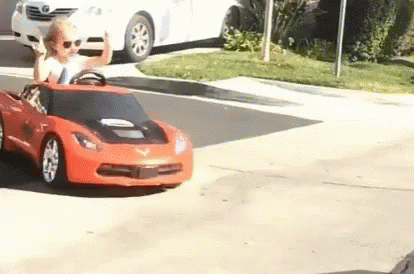 <br><br> Run this : DEMO ⬇️ </center>

Enter Valid year (1950 - 2023) -  2020


 [1] "Austria"          "Styria"           "Hungary"          "Great Britain"   
 [5] "70th Anniversary" "Spain"            "Belgium"          "Italy"           
 [9] "Tuscany"          "Russia"           "Eifel"            "Portugal"        
[13] "Emilia Romagna"   "Turkey"           "Bahrain"          "Sakhir"          
[17] "Abu Dhabi"       


Enter Circuit Name -  Russia


Race.Position No Laps Time.Retired PTS Starting.Position
1   1            77 53   1:34:00.364  26   3               
2   2            33 53   +7.729s      18   2               
3   3            44 53   +22.729s     15   1               
4   4            11 53   +30.558s     12   4               
5   5             3 53   +52.065s     10   5               
6   6            16 53   +62.186s      8  10               
7   7            31 53   +68.006s      6   7               
8   8            26 53   +68.740s      4  11               
9   9            10 53   +89.766s      2   9               
10 10            23 53   +97.860s      1  15               
11 11            99 52   +1 lap        0  17               
12 12            20 52   +1 lap        0  18               
13 13             5 52   +1 lap        0  14               
14 14             7 52   +1 lap        0  19               
15 15             4 52   +1 lap        0   8               
16 16             6 52   +1 lap        0  20               
17 17             8 52   +1 lap        0  16               
18 18            63 52   +1 lap        0  13               
19 NA            55  0   DNF           0   6               
20 NA            18  0   DNF           0  12               
   Driver                                                                                    
1  Valtteri\n                        Bottas\n                    \n                    BOT   
2  Max\n                        Verstappen\n                    \n                    VER    
3  Lewis\n                        Hamilton\n                    \n                    HAM    
4  Sergio\n                        Perez\n                    \n                    PER      
5  Daniel\n                        Ricciardo\n                    \n                    RIC  
6  Charles\n                        Leclerc\n                    \n                    LEC   
7  Esteban\n                        Ocon\n                    \n                    OCO      
8  Daniil\n                        Kvyat\n                    \n                    KVY      
9  Pierre\n                        Gasly\n                    \n                    GAS      
10 Alexander\n                        Albon\n                    \n                    ALB   
11 Antonio\n                        Giovinazzi\n                    \n                    GIO
12 Kevin\n                        Magnussen\n                    \n                    MAG   
13 Sebastian\n                        Vettel\n                    \n                    VET  
14 Kimi\n                        Räikkönen\n                    \n                    RAI    
15 Lando\n                        Norris\n                    \n                    NOR      
16 Nicholas\n                        Latifi\n                    \n                    LAT   
17 Romain\n                        Grosjean\n                    \n                    GRO   
18 George\n                        Russell\n                    \n                    RUS    
19 Carlos\n                        Sainz\n                    \n                    SAI      
20 Lance\n                        Stroll\n                    \n                    STR      
   Car                       Time     Position+G/-L
1  Mercedes                  1:31.956  2           
2  Red Bull Racing Honda     1:31.867  0           
3  Mercedes                  1:31.304 -2           
4  Racing Point BWT Mercedes 1:32.317  0           
5  Renault                   1:32.364  0           
6  Ferrari                   1:33.239  4           
7  Renault                   1:32.624  0           
8  AlphaTauri Honda          1:33.249  3           
9  AlphaTauri Honda          1:33.000  0           
10 Red Bull Racing Honda     1:33.008  5           
11 Alfa Romeo Racing Ferrari 1:34.594  6           
12 Haas Ferrari              1:34.681  6           
13 Ferrari                   1:33.609  1           
14 Alfa Romeo Racing Ferrari 1:35.267  5 

[1] "Fetching Table https://www.formula1.com/en/results.html/2020/races.html"
[1] "Fetching Complete. To access your data pass index to the list. Eg df[[1]]"
[1] "Fetching Table https://www.formula1.com/en/results.html/2020/races/1054/russia/race-result.html"
[1] "Fetching Complete. To access your data pass index to the list. Eg df[[1]]"
[1] "Fetching Table https://www.formula1.com/en/results.html/2020/races/1054/russia/fastest-laps.html"
[1] "Fetching Complete. To access your data pass index to the list. Eg df[[1]]"
[1] "Fetching Table https://www.formula1.com/en/results.html/2020/races/1054/russia/pit-stop-summary.html"
[1] "Fetching Complete. To access your data pass index to the list. Eg df[[1]]"
[1] "Fetching Table https://www.formula1.com/en/results.html/2020/races/1054/russia/starting-grid.html"
[1] "Fetching Complete. To access your data pass index to the list. Eg df[[1]]"
[1] "Positions +Gained / -Lost"
[1] "Overall Summary of Comparing Multiple Attributes from 4 tables"


`summarise()` has grouped output by 'Driver'. You can override using the `.groups` argument.



Starting.Position No No.of.Pitstops Total.Pitstop.Time(S) Laps Time.Retired
1   2                33  1             28.748                53   +7.729s     
2  14                 5  1             29.395                52   +1 lap      
3   4                11  1             29.602                53   +30.558s    
4  11                26  1             29.662                53   +68.740s    
5   3                77  1             29.750                53   1:34:00.364 
6  17                99  1             29.767                52   +1 lap      
7  20                 6  1             29.862                52   +1 lap      
8   7                31  1             30.068                53   +68.006s    
9   5                 3  1             30.112                53   +52.065s    
10 18                20  1             30.188                52   +1 lap      
11 10                16  1             30.261                53   +62.186s    
12 19                 7  1             33.317                52   +1 lap      
13  1                44  1             41.352                53   +22.729s    
14  9                10  2             59.179                53   +89.766s    
15 16                 8  2             60.042                52   +1 lap      
16 15                23  2             60.322                53   +97.860s    
17  8                 4  2             68.476                52   +1 lap      
18 13                63  3             89.273                52   +1 lap      
19  6                55 NA                 NA                 0   DNF         
20 12                18 NA                 NA                 0   DNF         
   PTS Race.Position
1  18   3           
2   0  14           
3  12   8           
4   4  12           
5  26   1           
6   0  16           
7   0  18           
8   6  13           
9  10   6           
10  0  17           
11  8  11           
12  0  10           
13 15   7           
14  2   2           
15  0  15           
16  1   9           
17  0   5           
18  0   4           
19  0  NA           
20  0  NA           
   Driver                                                                                    
1  Max\n                        Verstappen\n                    \n                    VER    
2  Sebastian\n                        Vettel\n                    \n                    VET  
3  Sergio\n                        Perez\n                    \n                    PER      
4  Daniil\n                        Kvyat\n                    \n                    KVY      
5  Valtteri\n                        Bottas\n                    \n                    BOT   
6  Antonio\n                        Giovinazzi\n                    \n                    GIO
7  Nicholas\n                        Latifi\n                    \n                    LAT   
8  Esteban\n                        Ocon\n                    \n                    OCO      
9  Daniel\n                        Ricciardo\n                    \n                    RIC  
10 Kevin\n                        Magnussen\n                    \n                    MAG   
11 Charles\n                        Leclerc\n                    \n                    LEC   
12 Kimi\n                        Räikkönen\n                    \n                    RAI    
13 Lewis\n                        Hamilton\n                    \n                    HAM    
14 Pierre\n                        Gasly\n                    \n                    GAS      
15 Romain\n                        Grosjean\n                    \n                    GRO   
16 Alexander\n                        Albon\n                    \n                    ALB   
17 Lando\n                        Norris\n                    \n                    NOR      
18 George\n                        Russell\n                    \n                    RUS    
19 NA                                                                                        
20 NA                  

Pos PTS Driver.No
1  1   26  77       
2  2   18  33       
3  3   15  44       
4  4   12  11       
5  5   10   3       
6  6    8  16       
7  7    6  31       
8  8    4  26       
9  9    2  10       
10 9    2  10       
11 10   1  23       
12 10   1  23       
13 11   0  99       
14 12   0  20       
15 13   0   5       
16 14   0   7       
17 15   0   4       
18 15   0   4       
19 16   0   6       
20 17   0   8       
21 17   0   8       
22 18   0  63       
23 18   0  63       
24 18   0  63       
25 NC   0  55       
26 NC   0  18       
   Driver                                                                                    
1  Valtteri\n                        Bottas\n                    \n                    BOT   
2  Max\n                        Verstappen\n                    \n                    VER    
3  Lewis\n                        Hamilton\n                    \n                    HAM    
4  Sergio\n                        Perez\n                    \n                    PER      
5  Daniel\n                        Ricciardo\n                    \n                    RIC  
6  Charles\n                        Leclerc\n                    \n                    LEC   
7  Esteban\n                        Ocon\n                    \n                    OCO      
8  Daniil\n                        Kvyat\n                    \n                    KVY      
9  Pierre\n                        Gasly\n                    \n                    GAS      
10 Pierre\n                        Gasly\n                    \n                    GAS      
11 Alexander\n                        Albon\n                    \n                    ALB   
12 Alexander\n                        Albon\n                    \n                    ALB   
13 Antonio\n                        Giovinazzi\n                    \n                    GIO
14 Kevin\n                        Magnussen\n                    \n                    MAG   
15 Sebastian\n                        Vettel\n                    \n                    VET  
16 Kimi\n                        Räikkönen\n                    \n                    RAI    
17 Lando\n                        Norris\n                    \n                    NOR      
18 Lando\n                        Norris\n                    \n                    NOR      
19 Nicholas\n                        Latifi\n                    \n                    LAT   
20 Romain\n                        Grosjean\n                    \n                    GRO   
21 Romain\n                        Grosjean\n                    \n                    GRO   
22 George\n                        Russell\n                    \n                    RUS    
23 George\n                        Russell\n                    \n                    RUS    
24 George\n                        Russell\n                    \n                    RUS    
25 Carlos\n                        Sainz\n                    \n                    SAI      
26 Lance\n                        Stroll\n                    \n                    STR      
   Car                       Stops Lap Time   Total   
1  Mercedes                   1    26  29.750 29.750  
2  Red Bull Racing Honda      1    25  28.748 28.748  
3  Mercedes                   1    16  41.352 41.352  
4  Racing Point BWT Mercedes  1    20  29.602 29.602  
5  Renault                    1    15  30.112 30.112  
6  Ferrari                    1    28  30.261 30.261  
7  Renault                    1    18  30.068 30.068  
8  AlphaTauri Honda           1    30  29.662 29.662  
9  AlphaTauri Honda           1    18  29.770 29.770  
10 AlphaTauri Honda           2    42  29.409 59.179  
11 Red Bull Racing Honda      1     1  30.211 30.211  
12 Red Bull Racing Honda      2    27  30.111 1:00.322
13 Alfa Romeo Racing Ferrari  1    16  29.767 29.767  
14 Haas Ferrari               1    19  30.188 30.188  
15 Ferrari                    1    30  29.395 29.395  
16 Alfa Romeo Raci

[1] "Pitstop Summary"
[1] "Driver points for Russia"


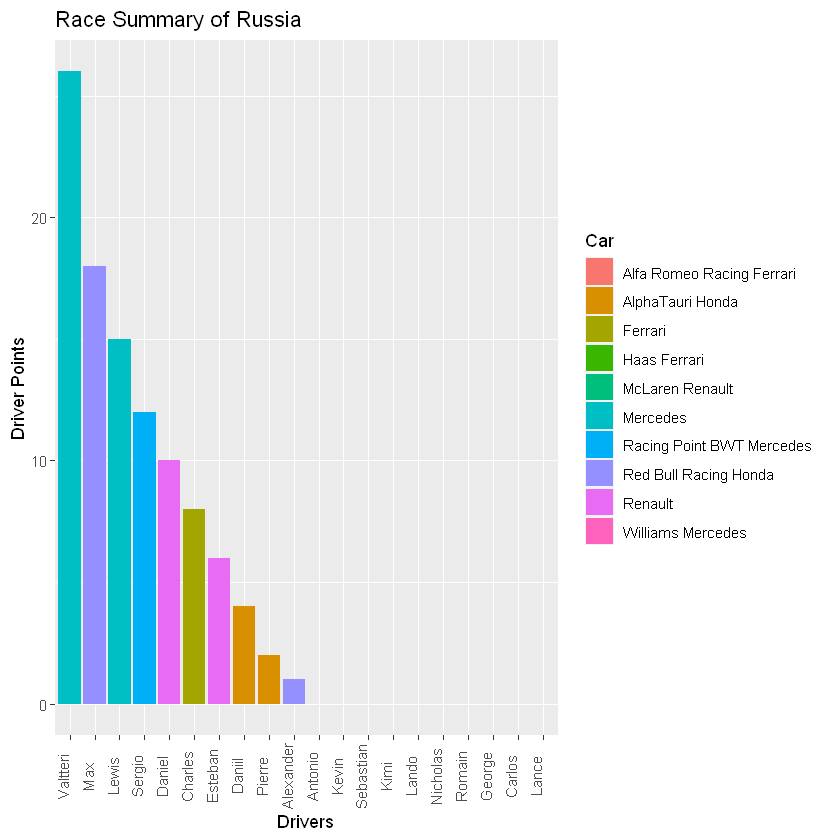

In [305]:
all_dfs <- race()

### Task (d): plot it (2 marks)

Use graphics (via `ggplot`) to represent the data you collected in a meaningful way.

In [306]:
# Storing Fastest Lap Data in fastest_lap_dataframe from the list of dataframes returned.
fastest_lap_df<- all_dfs[[3]]

In [307]:
fastest_lap_df %>% head()

Pos No
1 1   77
2 2   10
3 3   33
4 4   63
5 5    4
6 6    3
  Driver                                                                                  
1 Valtteri\n                        Bottas\n                    \n                    BOT 
2 Pierre\n                        Gasly\n                    \n                    GAS    
3 Max\n                        Verstappen\n                    \n                    VER  
4 George\n                        Russell\n                    \n                    RUS  
5 Lando\n                        Norris\n                    \n                    NOR    
6 Daniel\n                        Ricciardo\n                    \n                    RIC
  Car                   Lap Time.of.day Time     Avg.Speed
1 Mercedes              51  15:44:18    1:37.030 216.972  
2 AlphaTauri Honda      50  15:44:06    1:37.231 216.523  
3 Red Bull Racing Honda 53  15:47:41    1:37.332 216.298  
4 Williams Mercedes     52  15:48:55    1:37.352 216.254  
5 McLaren Renault       50  15:44:43    1:37.377 216.198  
6 Renault               53  15:48:20    1:37.886 215.074

## Creating a Plot for Fastest Lap by all drivers

In [310]:
fastest_lap_summary <- function(dataframe){
    
    # Create a new column 'DriverSubstring' by extracting the first 15 characters from the 'Driver' column
    dataframe$DriverSubstring <- substr(dataframe$Driver, start = 1, stop = 15)

    # Sorting the dataframe by Time in ascending order
    dataframe <- dataframe[order(dataframe$Time, na.last = TRUE), ]
    # Create a ggplot object 'f' for visualizing the data
    f <- ggplot(dataframe, aes(x = fct_inorder(DriverSubstring), y = Time, fill = Car)) + geom_bar(stat = "identity") + 
    
    # Customize the appearance of the plot, including rotating x-axis labels, setting axis labels, and specifying the title
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=0.5)) +
    labs(x = 'Drivers', y = 'Lap Time', title = sprintf('Fastest Lap time'))
    
    # Print the plot with grouped columns representing driver points
    print(f + geom_col())
}

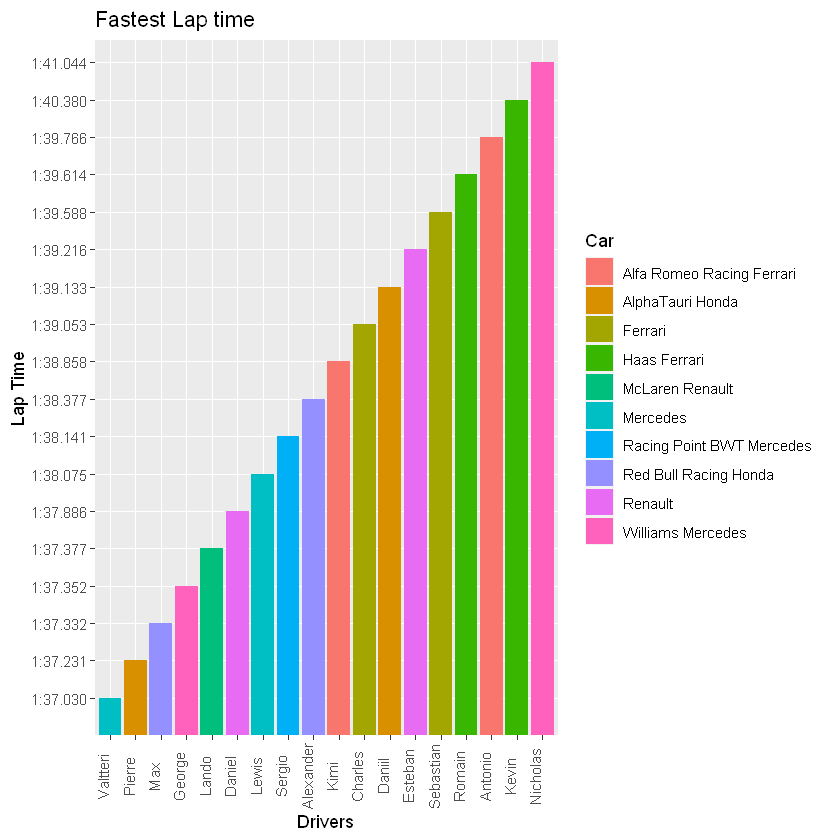

In [311]:
# Lets run the fastest lap function
fastest_lap_summary(fastest_lap_df)

## Lets Scrap Constructor Standings for say last 8 years (2015 - 2022)

In [313]:
# Making a range list for number of years from 2015 - 2022
last_years <- c(2015:2022)
# Lets see the list
last_years

[1] 2015 2016 2017 2018 2019 2020 2021 2022

In [314]:
# Made an empty year list to store urls for all the years knitted with a year
year_list <- c()
# Iterating over all the years in the last_years list to knit a custom url and add it to the year_list made earlier.
for (i in last_years){
    year_list <- append(year_list, sprintf('https://www.formula1.com/en/results.html/%d/team.html',i))
}

In [315]:
# Lets look at the list of urls of different years(2018 - 2022)
year_list

[1] "https://www.formula1.com/en/results.html/2015/team.html"
[2] "https://www.formula1.com/en/results.html/2016/team.html"
[3] "https://www.formula1.com/en/results.html/2017/team.html"
[4] "https://www.formula1.com/en/results.html/2018/team.html"
[5] "https://www.formula1.com/en/results.html/2019/team.html"
[6] "https://www.formula1.com/en/results.html/2020/team.html"
[7] "https://www.formula1.com/en/results.html/2021/team.html"
[8] "https://www.formula1.com/en/results.html/2022/team.html"

## Its good to be safe, <code><i>possibly</i></code>

In [316]:
# Making a safer version of our previously defined to make it more safer.
summary_safe <- purrr::possibly(.f = summary, otherwise = NA_character_)

In [317]:
# Mapping every link in the year_list to the safer version of summary function that we defined before
# that returns a list of dataframes for the all the links
all_team_df <- map(year_list, summary_safe)
#Status will be shown as output

[1] "Fetching Table https://www.formula1.com/en/results.html/2015/team.html"
[1] "Fetching Complete. To access your data pass index to the list. Eg df[[1]]"
[1] "Fetching Table https://www.formula1.com/en/results.html/2016/team.html"
[1] "Fetching Complete. To access your data pass index to the list. Eg df[[1]]"
[1] "Fetching Table https://www.formula1.com/en/results.html/2017/team.html"
[1] "Fetching Complete. To access your data pass index to the list. Eg df[[1]]"
[1] "Fetching Table https://www.formula1.com/en/results.html/2018/team.html"
[1] "Fetching Complete. To access your data pass index to the list. Eg df[[1]]"
[1] "Fetching Table https://www.formula1.com/en/results.html/2019/team.html"
[1] "Fetching Complete. To access your data pass index to the list. Eg df[[1]]"
[1] "Fetching Table https://www.formula1.com/en/results.html/2020/team.html"
[1] "Fetching Complete. To access your data pass index to the list. Eg df[[1]]"
[1] "Fetching Table https://www.formula1.com/en/results.ht

## We are interested in 3 top teams: 🔴 Ferrari 🟢 Mercedes 🔵 Red Bull

In [322]:
# Lets filter out all the teams that isn't required.
# Making a list of ferrari and mercedes.
teams_to_match <- c('Ferrari', 'Mercedes')
i <- 1
for (i in 1: length(all_team_df)){
    # Here we will store all the teams that are either ferrari or mercedes or Matching with red bull. 
    # Why is that? Because Red Bull has different names across different seasons.
    all_team_df[[i]] <- all_team_df[[i]] %>% filter(grepl("Red Bull", Team, ignore.case = TRUE)| Team %in% teams_to_match)
    # Mutate a Row with year so plotting becomes easier
    all_team_df[[i]] <- all_team_df[[i]] %>% mutate(Year = last_years[i])
}

In [327]:
# Lets show the 1st DF from the list of DF that is data for the firs year, 2015 in this case.
all_team_df[[1]]

Team                      PTS.x PTS.y PTS.x.x PTS.y.y PTS.x.x.x PTS.y.y.y
1 Mercedes                  703   765   668     655     739       573      
2 Ferrari                   428   398   522     571     504       131      
3 Red Bull Racing Renault   187    NA    NA      NA      NA        NA      
4 Red Bull Racing TAG Heuer  NA   468   368     419      NA        NA      
5 Red Bull Racing Honda      NA    NA    NA      NA     417       319      
6 Red Bull Racing RBPT       NA    NA    NA      NA      NA        NA      
  PTS.x.x.x.x PTS.y.y.y.y
1 613.5       515        
2 323.5       554        
3    NA        NA        
4    NA        NA        
5 585.5        NA        
6    NA       759

In [324]:
# Lets select only Team and Poits column because that is all we need and store it in the data itself.
all_team_df[[1]] <- all_team_df[[1]] %>% select(Team, PTS)
for (i in 2: length(all_team_df)){
    # Iterating through every dataframe in the list to select only Team and Points column.
    all_team_df[[i]] <- all_team_df[[i]] %>% select(Team, PTS)
    # Joining all the dataframes together so data for all the years will be in one dataframe for the 3 teams.
    all_team_df[[1]] <- all_team_df[[1]] %>% full_join(all_team_df[[i]],  by = "Team")
}

In [328]:
# Lets have a glance at the table.
df_total <- all_team_df[[1]]
all_team_df[[1]]

Team                      PTS.x PTS.y PTS.x.x PTS.y.y PTS.x.x.x PTS.y.y.y
1 Mercedes                  703   765   668     655     739       573      
2 Ferrari                   428   398   522     571     504       131      
3 Red Bull Racing Renault   187    NA    NA      NA      NA        NA      
4 Red Bull Racing TAG Heuer  NA   468   368     419      NA        NA      
5 Red Bull Racing Honda      NA    NA    NA      NA     417       319      
6 Red Bull Racing RBPT       NA    NA    NA      NA      NA        NA      
  PTS.x.x.x.x PTS.y.y.y.y
1 613.5       515        
2 323.5       554        
3    NA        NA        
4    NA        NA        
5 585.5        NA        
6    NA       759

In [329]:
# Lets rename all the columns for points with the names of years to make it more readable.
colnames(df_total)[1:length(last_years)+1] <- last_years
# Lets look at that
df_total

Team                      2015 2016 2017 2018 2019 2020 2021  2022
1 Mercedes                  703  765  668  655  739  573  613.5 515 
2 Ferrari                   428  398  522  571  504  131  323.5 554 
3 Red Bull Racing Renault   187   NA   NA   NA   NA   NA     NA  NA 
4 Red Bull Racing TAG Heuer  NA  468  368  419   NA   NA     NA  NA 
5 Red Bull Racing Honda      NA   NA   NA   NA  417  319  585.5  NA 
6 Red Bull Racing RBPT       NA   NA   NA   NA   NA   NA     NA 759

In [330]:
# Lets search for all the redbull franchise and rename them to just Red Bull for making our plotting easier.
df_total <- df_total %>% mutate(Team = ifelse(grepl("Red Bull", Team, ignore.case = TRUE), "Red Bull", Team))

In [331]:
# Lets look at the data
df_total

Team     2015 2016 2017 2018 2019 2020 2021  2022
1 Mercedes 703  765  668  655  739  573  613.5 515 
2 Ferrari  428  398  522  571  504  131  323.5 554 
3 Red Bull 187   NA   NA   NA   NA   NA     NA  NA 
4 Red Bull  NA  468  368  419   NA   NA     NA  NA 
5 Red Bull  NA   NA   NA   NA  417  319  585.5  NA 
6 Red Bull  NA   NA   NA   NA   NA   NA     NA 759

In [332]:
# Lets convert all the NA values to 0
df_total[is.na(df_total)] <- 0
# Lets look at the data
df_total

Team     2015 2016 2017 2018 2019 2020 2021  2022
1 Mercedes 703  765  668  655  739  573  613.5 515 
2 Ferrari  428  398  522  571  504  131  323.5 554 
3 Red Bull 187    0    0    0    0    0    0.0   0 
4 Red Bull   0  468  368  419    0    0    0.0   0 
5 Red Bull   0    0    0    0  417  319  585.5   0 
6 Red Bull   0    0    0    0    0    0    0.0 759

You can see we have Multiple Red Bulls in the table, Lets merge them

In [333]:
# Lets merge all the data for Red Bull into 1 single Row and store in dataframe named new
new <- aggregate(df_total[,-1], list(Team=df_total[,1]), FUN = sum)

In [334]:
new

Team     2015 2016 2017 2018 2019 2020 2021  2022
1 Ferrari  428  398  522  571  504  131  323.5 554 
2 Mercedes 703  765  668  655  739  573  613.5 515 
3 Red Bull 187  468  368  419  417  319  585.5 759

## Wide to Long Dataframe

To plot trend of points for the companies we'll be needing long data format

In [335]:
# Lets gather the data based on Years, So we make Years currently as column to rows
df_total_long <- new %>% 
                gather(key = Year, value = Score, as.character(last_years[1]):as.character(last_years[length(last_years)]))

In [336]:
# Lets Look what we did
print("OLD DATA - WIDE")
new
print("NEW DATA - LONG")
df_total_long %>% head()

[1] "OLD DATA - WIDE"


Team     2015 2016 2017 2018 2019 2020 2021  2022
1 Ferrari  428  398  522  571  504  131  323.5 554 
2 Mercedes 703  765  668  655  739  573  613.5 515 
3 Red Bull 187  468  368  419  417  319  585.5 759

[1] "NEW DATA - LONG"


Team     Year Score
1 Ferrari  2015 428  
2 Mercedes 2015 703  
3 Red Bull 2015 187  
4 Ferrari  2016 398  
5 Mercedes 2016 765  
6 Red Bull 2016 468

## Plotting Time

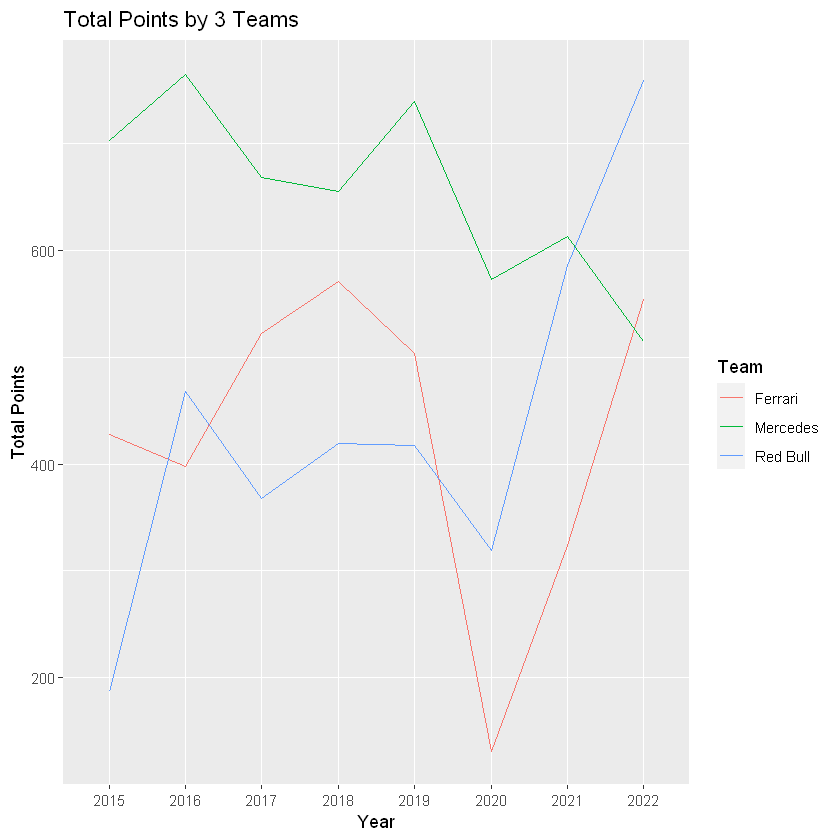

In [337]:
# Using ggplot on our new dataframe
plot <- ggplot(df_total_long) +
        # Using a line plot from ggplot and have x as Year column and y as Score column grouping them by team,
        # and giving it a nice color.
        geom_line(aes(x = Year, y = Score, group = Team, color = Team)) +
        labs(title = "Total Points by 3 Teams", x = "Year", y = "Total Points")

# Lets see
plot

## A fun plot

In [338]:
# We'll make it a little more user friendly by transiting throught trends over years.
plot + transition_reveal(as.integer(Year))

# Saving plot as gif
anim_save("team_points_comparison.gif")

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


Rendering [--------------------------------------------] at 3.8 fps ~ eta: 26s

Rendering [>-------------------------------------------] at 3.5 fps ~ eta: 28s

Rendering [>-------------------------------------------] at 3.2 fps ~ eta: 30s

Rendering [=>------------------------------------------] at 3.2 fps ~ eta: 30s

Rendering [==>-----------------------------------------] at 3.2 fps ~ eta: 29s

Rendering [===>----------------------------------------] at 3.2 fps ~ eta: 28s

Rendering [===>----------------------------------------] at 3.3 fps ~ eta: 28s

Rendering [====>---------------------------------------] at 3.3 fps ~ eta: 27s

Rendering [====>---------------------------------------] at 3.3 fps ~ eta: 26s

Rendering [=====>--------------------------------------] at 3.4 fps ~ eta: 26s


<b>NOTE: If after running the cell, you don't see the rendering graph, make sure the libraries from the top cell are imported properly.</b>

Let's save the exported gif into a variable with image_read function from magick library

In [339]:
# Make sure gif is in the same location as this notebook
gif <- image_read("team_points_comparison.gif")

In [340]:
# Embed the gif.
image_animate(gif)

<img src="data:image/gif;base64,R0lGODlh4AHgAfZeAAAAADoAAAAAOjoAOjMzMzo6OmYAAGY6AGYAOmZmOgAAZjoAZjo6ZmYA
ZgBmZjpmZk1NTW5NTU1Nbk1ubmZmZpA6AJA6OrZmALZmOpA6Zo5NTatuTbZmZvh2bQC6OJCQ
OraQOtuQOo6OTba2ZsiOTciObtuQZuSrbv+2ZgA6kDo6kGY6kABmtjpmtk1Njm5Njk1uq25u
q45NjpBmkI5uqzqQtmaQkG6rqzqQ202OyG6OyGaQ22Gc/26r5Ga2/8iOjuSrjrbbkJDbtrb/
tv/Ijv/bkNv/tv/kq///to6OyJCQ246r5Lb/247I/5Db/6vk/7b////b29v/2+T/yP//yP//
28jI/9vb/8j//9v//+vr6///5OT///Ly8v///wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAACH5BAQKAAAAIf8LTkVUU0NBUEUyLjADAQAAACwAAAAA4AHg
AQAH/4BegoOEhYaHiImKi4yNjo+QkZKTlJWWl5iZmpucnZ6foKGio6SlpqeoqaqrrK2ur7Cx
srO0tba3uLm6u7y9vr/AwcLDxMXGx8jJysvMzc7P0NHNRQEA1tYCTpFFC1CE1NcA2Yjc3pVV
FT6QKNjag+Dh49Lz9PWl5Yn4h/qC/Cjyj/glQqfOUZEB2lAoMPetm72HECNmEliI4juHFxkS
3IZR0UZJSBC4a8hQosmTKA3xA5cNiQFxCa+x8CKQ30aW2spx+2ANh0uYXtgBJYSOQk8vF2YK
CqHUUIgUWVR2/LlQkFAAM9HZqMYCnFKhAFOKHWtLn0t1CqHgOxs0W82Oaf/ZptUZAEfQhWtF
BoVKtALUs/g+fgsQNqOgjU+zyM2G7q8BqAedhEzIl6zly6705XVCcXLNatfGbdaJkGa3tQYK
GvqY9GbHQmmlmttMaPLG2+nYYt7NO5U+FHwJagbt9rVF4FGFn3aoE+NPAKoPp1s6k6mXEHYR
TZbdDzRQeIyn41b3PHrv8+g1aXbomXnp9iUtjl7urXnJuyVZ20XSgImFkYZsVxFGNb0n0nhe
CIZfegw2SIlZqeEX2YIXFBffa4LIhRd9pqlV2oSxDdJYFtQUdIENKkRFSGxFpMhdgtOVE1uF
TiAoXGkhOqjjjvl0hBOM0KFjTQ3pvHVfd99xWI7/kGi1U0hRR1kF3SEhWFPVi178NI6QABDp
g43TgQUgj2SW+YxFZqap5pqFWMfmm3CaSc2VcdZp55145qnnnnz26eefgAYq6KCEnqfFoYgm
quiiiXrB6KOQRvqoo5JWaqmilF6qqaSZbuoppp+GCqqopHZKqqemhsrnqYimyqqlrr7Kqayo
0qpprLYyimuuo/I6K6urvrqrr4cOS6yxviKbq7LLEvurs5MKu6eszNpaLa3XUgtttNvq2q23
3/Za6rTChiuuudmWa26x67baLrvvpospucC+q4W8p+Jbarz26iuqv6pKq6e2/BbcLsC1Grwu
wgnnS2++/UascLgMb1rx/60SOzywugdnvPDEFHuMrsB5EtwxyN9eDKvIIaOM6sP7urytyiuf
bPPHMt8K878sp9zzzD8DnfOlwdY79LFBO0tzpUs/i7PGJXP89NQj31y11S1DjafJVGfddbdN
Rxo2pGNzq/WdXF/9NdhHJ5u00iRvLbXadHtt990+t83pzgHr3azf2L6NNOCT8v1p2eBinffa
QivONrCGN8w4tIgvWnmjgrtNuK6RW5w5r5dj7njjk8MN+cZGj07559ay3vrmlneOMeypl665
6qbjDqvsRLseOO0x63677UzzXrPwoPs+N96PIy+28Uwrv/zidVNfffPjog4x8MET/7fzr4Nf
uP/23V9Puvm5e/+9+mRD7zT66cM/vPzzM2+x+2JLXzv96/Pfv/06Ix/PuDdA8U0Pe/4LX/ai
tj8Axs+B9bMeBCP4MgH2zYAHPJ8EN4jACe7NgofT3/YwOEL2/Y6EjcIf2URYPg8qMIEnNCHn
QCg5GKbNhTG0YQZXdzoGllCHDeQgD1HYQiEG0IdF7KARH6jEJmpwibujoecIeEEZBtGJQ7Ti
vKQ4OyIWUItJfCIWmVhBJH4RiD/E4Q2hSEEx3o+LvaNiCOU4RS9WEY2tUqHZwBjGLKpxjWMc
3NnsBEg3+vGPVzQkGRUZRTPeEZGJPGQg2yjJSX7QkXO0Yyb5+Eg2Jo//ikVLoyf/N8ocQlKU
lnweHI/HyU6m0pSlhOUrx4fJGp6yj4vMpS4F2cpQ4pKXeDxjLAtZSUYWb5XRo2MdW2nLYe5w
l8es5TKD6UpjknKWxITmJeUWSW1e05ovvKUwnblFaXaRmc3EZjeBKc5qHpGbqARnOMn5S0p6
c55lhGc9P6nJdBbzn/eU5RvNGcd+TrOd/gQoO+mZR2S+D6EJDegzF6rOdUZTn+OsaDwVyk90
HpShxSqUSEdK0ldkk6LyFKhEJ2pPlL4TbSztKDU3CdGPanSfqiQoK2caUZf69KctDeo2YWpR
mdb0nEctqEeRqio9Jm6pSuUpU0HqzpWWE6NV/wWqUanaU6F+k6NDJWRMv2rVjWqVrGfF50Cx
StOk7tStD+VqV7eaT6KaNa0qLWtGU3pSr7bPoflT5lRvmlW/5hWvM9RpMg06WL4WFa2G7WtY
6yRZyNLVsXeN7FjV+lKxPpazet1raAt7WbDmlK1ztaxqQavZzx62tSkE7AoFG1W4BpaxtaWq
L0U72rbKtbGmZS1sG6rYuBKWtKutrHBLO9rdIne5yVWudKe72ddONk7UdW12Mxvd6m4Xp38t
7m2h+tbf5va4vj2uc9OLWe52173Qja91T2tX8M5Xvt997n33m997OdVyLOQtYrXr3QIT+Kr1
FfBwFczcBeu3v+ztLP9lDQxf/lKYwe+tcH/Xm1r8XhjDFj6whj/sX9nuUarA7a1N22vfDf/3
XLYdL4rLi94Ohzi24p0tbmnM4geTOMLNfbHodrxY8hq3xz4WMXFRu+Lg3rjFSgbxk6WcWCan
eMBRTjKUswxkLOPYyudFcpcdbGMIl5nEHG6yitXsZSr/+MxZTvOVyQznEdv5zlvGc0hN/NQZ
89jJb2YznQV9XTiZmdAZzrObuVxnRe85xyeOsY6NLGNJR1q3QnYXbf+85jADOtBzLvSbDh3q
RC/a0VpG9ZhFzSZSe7rTrx50qT0c50zDi8hH/rSeU31qVMs51rIGdoOHTWxT87rEkO6zpZX/
bV5Ot7nX0EY2mJ0dbGoXe8rHXrWxf21tY2ub1qpudLS/TctpF9nP5142jJvdbXAvOcHZFne8
EY1tcru63eWGt71BLWxv07ve8t43gj27a4EXPOD/vne6Mc1nAG964TWeNcATjmZb3yvA85Y4
v/Gt8FwTzeKh0zSuKx1xjW8c4mvVN8IpzmiWh9vlLzf5wCfccpkfHOYZ77e7o81tlOv65jYf
98qDznOQY9zgMef4yT3+bGmjZwsbgAAMuAB1COTAC1W/eiE6TvKS65zrk0Y30y+KnhM0wQtm
J0IPvECCJqid7WcnBNgv7XWlA/3rc2d2Xc/zAxFInQtAeIIX1B74/8Gv3QsESHxJF894TrTd
8CUQvNojb/itL73rYh663e++eV876AdYMHzhCS/5ww8i7w4fedjZ7XNYd/7R6TH74N2+9ra/
/fFyv/zqWT92f+M85693+nmqPvWsYz3qWs99zfGue7r/POnBRzrsVf576QO/9dXGfvZ7T1+C
Q1/7154485cffXn3nPs7vz76Ub/uuoO/+zTn/PvTb33Nl7/65jf6w9fPfpFTGvPPN33eJ3T4
V4BEV3/2N3/Ydn4A6HoK2H+39n

# A tibble: 100 x 7
   format width height colorspace matte filesize density
   <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
 1 gif      480    480 sRGB       TRUE         0 72x72  
 2 gif      480    480 sRGB       TRUE         0 72x72  
 3 gif      480    480 sRGB       TRUE         0 72x72  
 4 gif      480    480 sRGB       TRUE         0 72x72  
 5 gif      480    480 sRGB       TRUE         0 72x72  
 6 gif      480    480 sRGB       TRUE         0 72x72  
 7 gif      480    480 sRGB       TRUE         0 72x72  
 8 gif      480    480 sRGB       TRUE         0 72x72  
 9 gif      480    480 sRGB       TRUE         0 72x72  
10 gif      480    480 sRGB       TRUE         0 72x72  
# ... with 90 more rows

### Task (e): APIs (2 marks)

Identify a web service offering data through an API. Access the API using `httr` and collect the information you care about. Convert the data into a dataframe (or more than one). Represent it graphically in a meaningful way.

## We are scraping a NewsApi which is free for GET request. Check more here - https://newsapi.org/docs/endpoints/everything
## We are using 'everything' endpoint that gives us top 100 news based on our search query passed in url as 'q', In this case its 'rugby'


In [341]:
# Importing httr for collecting API response
library('httr')

In [342]:
# Storing API url for making the request.

# API key is something private based on account of a user. Replace it will your own API key.
# Which you can get from newsAPI website by simply signing in
apiKey = 'cdcfbdb49fc34fe1824b72090a7d502d'

url <- sprintf('https://newsapi.org/v2/everything?q=rugby&apiKey=%s', apiKey)

Making a GET request to the url

In [348]:
# Making a GET request and storing response object into website variable
website <- GET(url)

In [349]:
# Lets see what we got
website

Response [https://newsapi.org/v2/everything?q=rugby&apiKey=cdcfbdb49fc34fe1824b72090a7d502d]
  Date: 2023-09-29 04:14
  Status: 200
  Content-Type: application/json; charset=utf-8
  Size: 96 kB


In [345]:
# Parsing the json file received and storing it in data variable
data <- content(website)

In [346]:
# Let's see what we have after parsing
data

$status
[1] "ok"

$totalResults
[1] 7185

$articles
$articles[[1]]
$articles[[1]]$source
$articles[[1]]$source$id
[1] "bbc-news"

$articles[[1]]$source$name
[1] "BBC News"


$articles[[1]]$author
NULL

$articles[[1]]$title
[1] "Rugby World Cup quarter-final permutations: What England, Scotland & Ireland need to qualify"

$articles[[1]]$description
[1] "The World Cup pool stage is approaching its conclusion - here are the permutations from the remaining group games."

$articles[[1]]$url
[1] "https://www.bbc.co.uk/sport/rugby-union/66914301"

$articles[[1]]$urlToImage
[1] "https://ichef.bbci.co.uk/live-experience/cps/624/cpsprodpb/8381/production/_131256633_ac992ffc-0019-4f02-ac1d-4b77ac2f0eea.jpg"

$articles[[1]]$publishedAt
[1] "2023-09-26T11:54:32Z"

$articles[[1]]$content
[1] "Wales were the only nation to qualify for the knockout stage after the opening three rounds of fixtures at the 2023 Rugby World Cup\r\n<table><tr><th>2023 Rugby World Cup</th></tr>\r\n<tr><td>Venue: Fran… [+6552 chars]"


$articles[[2]]
$articles[[2]]$source
$articles[[2]]$source$id
[1] "business-insider"

$articles[[2]]$source$name
[1] "Business Insider"


$articles[[2]]$author
[1] "Quentyn Kennemer"

$articles[[2]]$title
[1] "Where to watch Rugby World Cup live streams free from anywhere: France vs. New Zealand tonight"

$articles[[2]]$description
[1] "The Rugby World Cup promises brutal tackles and sensational tries. Here are your free live stream options to watch your national Rugby team compete for global glory."

$articles[[2]]$url
[1] "https://www.businessinsider.com/guides/streaming/where-to-watch-rugby-world-cup-live-stream-free-online-2023"

$articles[[2]]$urlToImage
[1] "https://i.insider.com/64fb17e4a39a1b00190b9cb1?width=1200&format=jpeg"

$articles[[2]]$publishedAt
[1] "2023-09-08T16:15:01Z"

$articles[[2]]$content
[1] "Anne-Christine Poujoulat/AFP via Getty Images\r\nWhen you buy through our links, Insider may earn an affiliate commission. Learn moreFrance hosts the 2023 Rugby World Cup, but you don't need to live ne… [+9866 chars]"


$articles[[3]]
$articles[[3]]$source
$articles[[3]]$source$id
[1] "bbc-news"

$articles[[3]]$source$name
[1] "BBC News"


$articles[[3]]$author
NULL

$articles[[3]]$title
[1] "France 96-0 Namibia: Hosts ruthlessly win 2023 Rugby World Cup clash"

$articles[[3]]$description
[1] "France are on the brink of reaching the World Cup quarter-finals after claiming the biggest win of the 2023 tournament with a 96-0 victory over Namibia."

$articles[[3]]$url
[1] "https://www.bbc.co.uk/sport/rugby-union/66884634"

$articles[[3]]$urlToImage
[1] "https://ichef.bbci.co.uk/live-experience/cps/624/cpsprodpb/11787/production/_124395517_bbcbreakingnewsgraphic.jpg"

$articles[[3]]$publishedAt
[1] "2023-09-21T20:55:31Z"

$articles[[3]]$content
[1] "<table><tr><th>Rugby World Cup Pool A: France v Uruguay</th></tr>\r\n<tr><td>France: (54) 96</td></tr><tr><td>Tries: Penaud 3, Danty 2, Ollivon 2, Flament, Dupont, Bielle-Biarry 2, Couilloud, Jaminet, … [+1124 chars]"


$articles[[4]]
$articles[[4]]$source
$articles[[4]]$source$id
[1] "business-insider"

$articles[[4]]$source$name
[1] "Business Insider"


$articles[[4]]$author
[1] "Brendan Griffiths,Quentyn Kennemer"

$articles[[4]]$title
[1] "Free Wales vs. Australia live stream: Where to watch Rugby World Cup online from anywhere"

$articles[[4]]$description
[1] "Watch Wales vs. Australia in the Rugby World Cup today, with free live stream options available to anyone."

$articles[[4]]$url
[1] "https://www.businessinsider.com/guides/streaming/wales-vs-australia-where-to-watch-rugby-world-cup-live-stream-free-online-2023"

$articles[[4]]$urlToImage
[1] "https://i.insider.com/650ddaaa23ce9d00190897f7?width=1200&format=jpeg"

$articles[[4]]$publishedAt
[1] "2023-09-24T16:30:01Z"

$articles[[4]]$content
[1] "When you buy through our links, Insider may earn an affiliate commission. Learn more\r\nTwo of Rugby's best teams have drawn each other in group stages of the 2023 Rugby World Cup,

Notice the data parsed above is in pretty much readable format, lets store it in a dataframe

In [350]:
# Store the articles key from json dictionary to articles
articles <- data$articles

In [351]:
# Lets check the class of articles
articles %>% class()
# Lets see the number of articles requested
length(articles)

[1] "list"

[1] 100

In [352]:
# Convert all the articles from the list to a tidy dataframe
news_dataframe <- data.frame(do.call(rbind, articles[1:length(articles)]))

In [353]:
news_dataframe %>% head(2)

source                             author          
1 bbc-news, BBC News                 NULL            
2 business-insider, Business Insider Quentyn Kennemer
  title                                                                                         
1 Rugby World Cup quarter-final permutations: What England, Scotland & Ireland need to qualify  
2 Where to watch Rugby World Cup live streams free from anywhere: France vs. New Zealand tonight
  description                                                                                                                                                          
1 The World Cup pool stage is approaching its conclusion - here are the permutations from the remaining group games.                                                   
2 The Rugby World Cup promises brutal tackles and sensational tries. Here are your free live stream options to watch your national Rugby team compete for global glory.
  url                                                                                                         
1 https://www.bbc.co.uk/sport/rugby-union/66914301                                                            
2 https://www.businessinsider.com/guides/streaming/where-to-watch-rugby-world-cup-live-stream-free-online-2023
  urlToImage                                                                                                                    
1 https://ichef.bbci.co.uk/live-experience/cps/624/cpsprodpb/8381/production/_131256633_ac992ffc-0019-4f02-ac1d-4b77ac2f0eea.jpg
2 https://i.insider.com/64fb17e4a39a1b00190b9cb1?width=1200&format=jpeg                                                         
  publishedAt         
1 2023-09-26T11:54:32Z
2 2023-09-08T16:15:01Z
  content                                                                                                                                                                                                                   
1 Wales were the only nation to qualify for the knockout stage after the opening three rounds of fixtures at the 2023 Rugby World Cup\r\n<table><tr><th>2023 Rugby World Cup</th></tr>\r\n<tr><td>Venue: Fran… [+6552 chars]
2 Anne-Christine Poujoulat/AFP via Getty Images\r\nWhen you buy through our links, Insider may earn an affiliate commission. Learn moreFrance hosts the 2023 Rugby World Cup, but you don't need to live ne… [+9866 chars]

Plotting top 10 news articles writers in a column chart

In [354]:
# Group the news dataframe by the "author" column and summarize the number of articles
no_of_articles_ <- news_dataframe %>%
  group_by(author) %>%
  summarise(Number = length(author))

In [355]:
# Convert name of authors from list to character so it will helpful in plotting
no_of_articles_per_author$author <- as.character(no_of_articles_per_author$author)

In [356]:
# Lets see the top n rows of it
no_of_articles_per_author %>% top_n(5)

Selecting by Number



author             Number
1 Martin Untersinger 11    
2 Clément Martel     13    
3 Jérôme Porier       8    
4 Le Monde           10    
5 Valentin Moinard   10

In [361]:
# Store the top most active authors in a new dataframe that we will be plotting and sorting it with respect to articles published count
top_5_writers <- no_of_articles_per_author[order(with(no_of_articles_per_author, -Number)), ]

In [363]:
# Store top 5 rows in a new dataframe
top_5_writers <- top_5_writers %>% head(5)

In [364]:
top_5_writers

author             Number
1 Clément Martel     13    
2 Martin Untersinger 11    
3 Le Monde           10    
4 Valentin Moinard   10    
5 Jérôme Porier       8

## Plotting the Number of Articles 

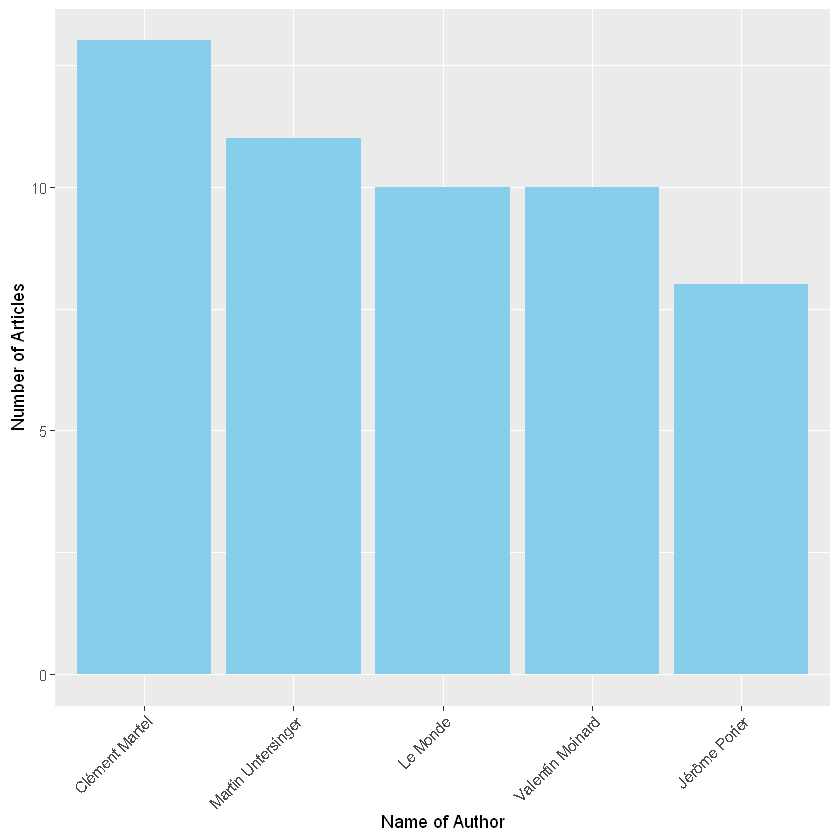

In [365]:
# Create a base ggplot object with specified aesthetics (x and y variables)
plot <- ggplot(top_5_writers, aes(x = fct_inorder(author), y = Number)) + 

# Add labels for the x and y axes
labs(x = "Name of Author", y = "Number of Articles")

# Add column (bar) geometry to the plot and set the fill color to skyblue
plot + geom_col(fill = "skyblue") + 

# Customize the appearance of the x-axis labels by rotating them at a 45-degree angle and adjusting their horizontal justification
theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Julia part (5 marks)

Reproduce (at least part) of the scraping workflow you have done in R using Julia.

**you will need to do this in a new, separated notebook or pluto notebook**

_hint_ this is the moment to go back to the Julia notebooks from the lab if you have not done them.

## In Julia-Assignment-2.ipynb